# Preparar Dataset para los diferentes modelos



In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import v_measure_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import california_housing
from sklearn.tree import DecisionTreeClassifier
#import Orange

In [7]:
X_train1 = pd.read_csv('../Datasets/Datasets Finales/X_trainv5.csv')

In [6]:
X_train1.corr()['Total Activo EUR Últ. año disp.']['Ingresos de explotación EUR Año - 1']

0.45499750393154953

In [3]:
len(X_train1)

32088

In [4]:
X_train1.head()

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Código primario CNAE 2009,Ult. año disponible,CNAE_Number,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,DESTILERIAS MANUEL ACHA FABRICA DE LICORES SA,AMURRIO,País Vasco,A01000603,Sociedad anonima,1101.0,2017.0,C,2029756.0,2036739.0,...,6.84,13.77,15.88,-7.73,0.09,0.40,-0.01,443.29,63.124768,364.443625
1,CONFITURAS GOYA SA,VITORIA-GASTEIZ,País Vasco,A01003904,Sociedad anonima,1082.0,2017.0,C,3820075.0,3602883.0,...,14.10,0.36,-10.47,-0.01,0.09,-0.19,-0.46,-34.71,62.330000,30.390000
2,MOYALE SA,VITORIA-GASTEIZ,País Vasco,A01006501,Sociedad anonima,4321.0,2017.0,F,1832508.0,1968603.0,...,NaN,16.30,11.62,176.32,5.45,-0.78,6.15,-60.15,170.090000,-58.120000
3,MAQUINARIA AGRICOLA CARIÑANOS SA,SALVATIERRA O AGURAIN,País Vasco,A01017128,Sociedad anonima,4669.0,2017.0,G,2435823.0,2710232.0,...,-4.87,-8.71,-9.75,147.87,0.02,-0.19,1.62,44.59,70902.790000,-100.000000
4,URBANIZADORA BASCONGADA SA,BURGOS,Castilla y León,A01019546,Sociedad anonima,6832.0,2016.0,L,782891.0,19850793.0,...,-11.33,-64.67,-36.50,-19.47,-0.98,-0.41,-0.03,-74.30,-21.390000,-95.150000


In [5]:
X_train1[X_train1.duplicated()]

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Código primario CNAE 2009,Ult. año disponible,CNAE_Number,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2


In [6]:
valores = X_train1.iloc[:9,:5].values
valores.reshape((3,3,5))

array([[['DESTILERIAS MANUEL ACHA FABRICA DE LICORES SA', 'AMURRIO',
         'País Vasco', 'A01000603', 'Sociedad anonima'],
        ['CONFITURAS GOYA SA', 'VITORIA-GASTEIZ', 'País Vasco',
         'A01003904', 'Sociedad anonima'],
        ['MOYALE SA', 'VITORIA-GASTEIZ', 'País Vasco', 'A01006501',
         'Sociedad anonima']],

       [['MAQUINARIA AGRICOLA CARIÑANOS SA', 'SALVATIERRA O AGURAIN',
         'País Vasco', 'A01017128', 'Sociedad anonima'],
        ['URBANIZADORA BASCONGADA SA', 'BURGOS', 'Castilla y León',
         'A01019546', 'Sociedad anonima'],
        ['VITORIANA DE MOTOS SA', 'VITORIA-GASTEIZ', 'País Vasco',
         'A01041318', 'Sociedad anonima']],

       [['INDUSTRIA AUXILIAR MECANICA SA', 'VITORIA-GASTEIZ',
         'País Vasco', 'A01044205', 'Sociedad anonima'],
        ['INTERNACIONAL DE PRODUCTOS METALICOS SA', 'VITORIA-GASTEIZ',
         'País Vasco', 'A01044353', 'Sociedad anonima'],
        ['MUDANZAS Y TRANSPORTES JUBERA SA', 'VITORIA-GASTEIZ',
      

In [7]:
columnas_=[]
for i in range(8,len(X_train1.columns)):
    columnas_.append(X_train1.columns[i])
columnas_

['Ingresos de explotación EUR Últ. año disp.',
 'Ingresos de explotación EUR Año - 1',
 'Ingresos de explotación EUR Año - 2',
 'Result. ordinarios antes Impuestos EUR Últ. año disp.',
 'Result. ordinarios antes Impuestos EUR Año - 1',
 'Result. ordinarios antes Impuestos EUR Año - 2',
 'Resultado del Ejercicio EUR Últ. año disp.',
 'Resultado del Ejercicio EUR Año - 1',
 'Resultado del Ejercicio EUR Año - 2',
 'Total Activo EUR Últ. año disp.',
 'Total Activo EUR Año - 1',
 'Total Activo EUR Año - 2',
 'Fondos propios EUR Últ. año disp.',
 'Fondos propios EUR Año - 1',
 'Fondos propios EUR Año - 2',
 'Rentabilidad económica (%) % Últ. año disp.',
 'Rentabilidad económica (%) % Año - 1',
 'Rentabilidad económica (%) % Año - 2',
 'Rentabilidad financiera (%) % Últ. año disp.',
 'Rentabilidad financiera (%) % Año - 1',
 'Rentabilidad financiera (%) % Año - 2',
 'Liquidez general % Últ. año disp.',
 'Liquidez general % Año - 1',
 'Liquidez general % Año - 2',
 'Endeudamiento (%) % Últ. añ

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train1[columnas_])
X_train2 = imp.transform(X_train1[columnas_])#Quitamos los valores nulos
X_train3 = pd.DataFrame(X_train2,columns=columnas_)
part1 = X_train1.iloc[:,:8]
X_train2 = pd.concat([part1,X_train3],axis=1)
#X_train2.isnull().any().any()
X_train = X_train2.drop(['Nombre','Localidad','Código NIF','Ult. año disponible',
                         'Código primario CNAE 2009'],axis=1)
comu_auto = pd.get_dummies(X_train['Comunidad autónoma'])
form = pd.get_dummies(X_train['Forma jurídica'])
CNAE = pd.get_dummies(X_train['CNAE_Number'])
X_train = X_train.drop(['Comunidad autónoma','Comunidad autónoma','CNAE_Number'],axis=1)
X_train = X_train.drop(['Forma jurídica'],axis=1)
X_train = pd.concat([comu_auto,form,CNAE,X_train],axis=1)
X_train

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Castilla y León,Castilla-La Mancha,Cataluña,Ceuta,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,0,0,0,0,0,0,0,0,0,0,...,6.840000,13.770000,15.880000,-7.730000,9.000000e-02,0.400000,-0.010000,443.29,6.312477e+01,364.443625
1,0,0,0,0,0,0,0,0,0,0,...,14.100000,0.360000,-10.470000,-0.010000,9.000000e-02,-0.190000,-0.460000,-34.71,6.233000e+01,30.390000
2,0,0,0,0,0,0,0,0,0,0,...,10861.741414,16.300000,11.620000,176.320000,5.450000e+00,-0.780000,6.150000,-60.15,1.700900e+02,-58.120000
3,0,0,0,0,0,0,0,0,0,0,...,-4.870000,-8.710000,-9.750000,147.870000,2.000000e-02,-0.190000,1.620000,44.59,7.090279e+04,-100.000000
4,0,0,0,0,0,0,1,0,0,0,...,-11.330000,-64.670000,-36.500000,-19.470000,-9.800000e-01,-0.410000,-0.030000,-74.30,-2.139000e+01,-95.150000
5,0,0,0,0,0,0,0,0,0,0,...,-28.510000,-3.330000,0.720000,-11.080000,-1.800000e-01,-0.010000,-3.360000,-63.82,-5.880000e+00,24.610000
6,0,0,0,0,0,0,0,0,0,0,...,-24.210000,-15.720000,13.170000,-21.790000,-4.900000e-01,17.120000,-0.920000,65.68,-1.418000e+01,41.320000
7,0,0,0,0,0,0,0,0,0,0,...,-50.210000,14.350000,28.320000,-4.590000,1.300000e-01,0.520000,-0.130000,-15.09,3.149400e+02,-62.260000
8,0,0,0,0,0,0,0,0,0,0,...,-57.210000,58414.988031,3470.664458,50194.474782,-1.460000e+00,-0.780000,-0.310000,103.91,-7.390000e+00,240.940000
9,0,0,0,0,0,0,0,0,0,0,...,7.780000,1.990000,7.640000,2.990000,1.000000e-02,0.080000,0.060000,-66.96,-4.620000e+01,216.140000


In [9]:
num = [i for i in X_train.columns].index('Ingresos de explotación EUR Últ. año disp.')

In [10]:
prueba =X_train[X_train.columns[50:]]

In [11]:
y = pd.read_csv('../Datasets/Datasets Finales/Y_trainv5.csv')

In [12]:
y.shape

(32088, 1)

In [13]:
y['Estado'].value_counts()

Activa      29161
Concurso     2927
Name: Estado, dtype: int64

In [14]:
def ult_ano(X):
    columnas = list(X.columns)
    return list(X.columns[:9]) +[i for i in columnas if 'Últ. año disp.' in i]
    

In [15]:
prueba.head()

,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,Ingresos de explotación EUR Año - 2,Result. ordinarios antes Impuestos EUR Últ. año disp.,Result. ordinarios antes Impuestos EUR Año - 1,Result. ordinarios antes Impuestos EUR Año - 2,Resultado del Ejercicio EUR Últ. año disp.,Resultado del Ejercicio EUR Año - 1,Resultado del Ejercicio EUR Año - 2,Total Activo EUR Últ. año disp.,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,2029756.0,2036739.0,2133288.0,11069.0,30186.0,9513.0,11069.0,30186.0,9513.0,3029727.0,...,6.840000,13.77,15.88,-7.73,0.09,0.40,-0.01,443.29,63.124768,364.443625
1,3820075.0,3602883.0,3649645.0,78372.0,37732.0,38010.0,16388.0,21023.0,21671.0,1606971.0,...,14.100000,0.36,-10.47,-0.01,0.09,-0.19,-0.46,-34.71,62.330000,30.390000
2,1832508.0,1968603.0,1037439.0,159056.0,19279.0,9831.0,153210.0,15859.0,8899.0,1514101.0,...,10861.741414,16.30,11.62,176.32,5.45,-0.78,6.15,-60.15,170.090000,-58.120000
3,2435823.0,2710232.0,2195013.0,54976.0,91418.0,24639.0,59172.0,69430.0,18726.0,2727276.0,...,-4.870000,-8.71,-9.75,147.87,0.02,-0.19,1.62,44.59,70902.790000,-100.000000
4,782891.0,19850793.0,6706879.0,2551713.0,-9624173.0,-1845499.0,2478159.0,-8371203.0,-3041086.0,52475548.0,...,-11.330000,-64.67,-36.50,-19.47,-0.98,-0.41,-0.03,-74.30,-21.390000,-95.150000


In [14]:
X_train1['Forma jurídica'].value_counts()

Sociedad limitada                      29863
Sociedad anonima                        2008
Cooperativa                              157
Asociación                                30
Otros tipos no definidos                  22
Sociedad regular colectiva                 2
Sociedad civil                             2
Sociedad comanditaria                      2
Unión temporal de empresas                 1
Entidades extranjeras no residentes        1
Name: Forma jurídica, dtype: int64

In [16]:
[(i/X_train1.shape[0]) * 100 for i in X_train1['Forma jurídica'].value_counts() ]

[93.0659436549489,
 6.2577910745450005,
 0.48927948142607824,
 0.09349289454001496,
 0.06856145599601098,
 0.006232859636000998,
 0.006232859636000998,
 0.006232859636000998,
 0.003116429818000499,
 0.003116429818000499]

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,15))
plt.plot(X_train1['Forma jurídica'].value_counts(),'bo')
plt.plot(X_train1['Forma jurídica'].value_counts())
plt.xlabel('Forma fiscal')
plt.ylabel('Número de empresas')
plt.savefig('Estudio de la forma fiscal')
plt.show()

<Figure size 3000x1500 with 1 Axes>

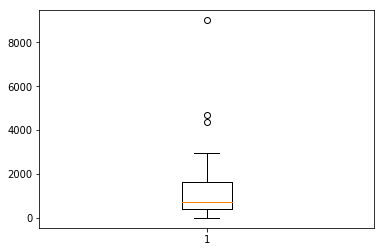

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(list(X_train1['CNAE_Number'].value_counts()))
plt.show()

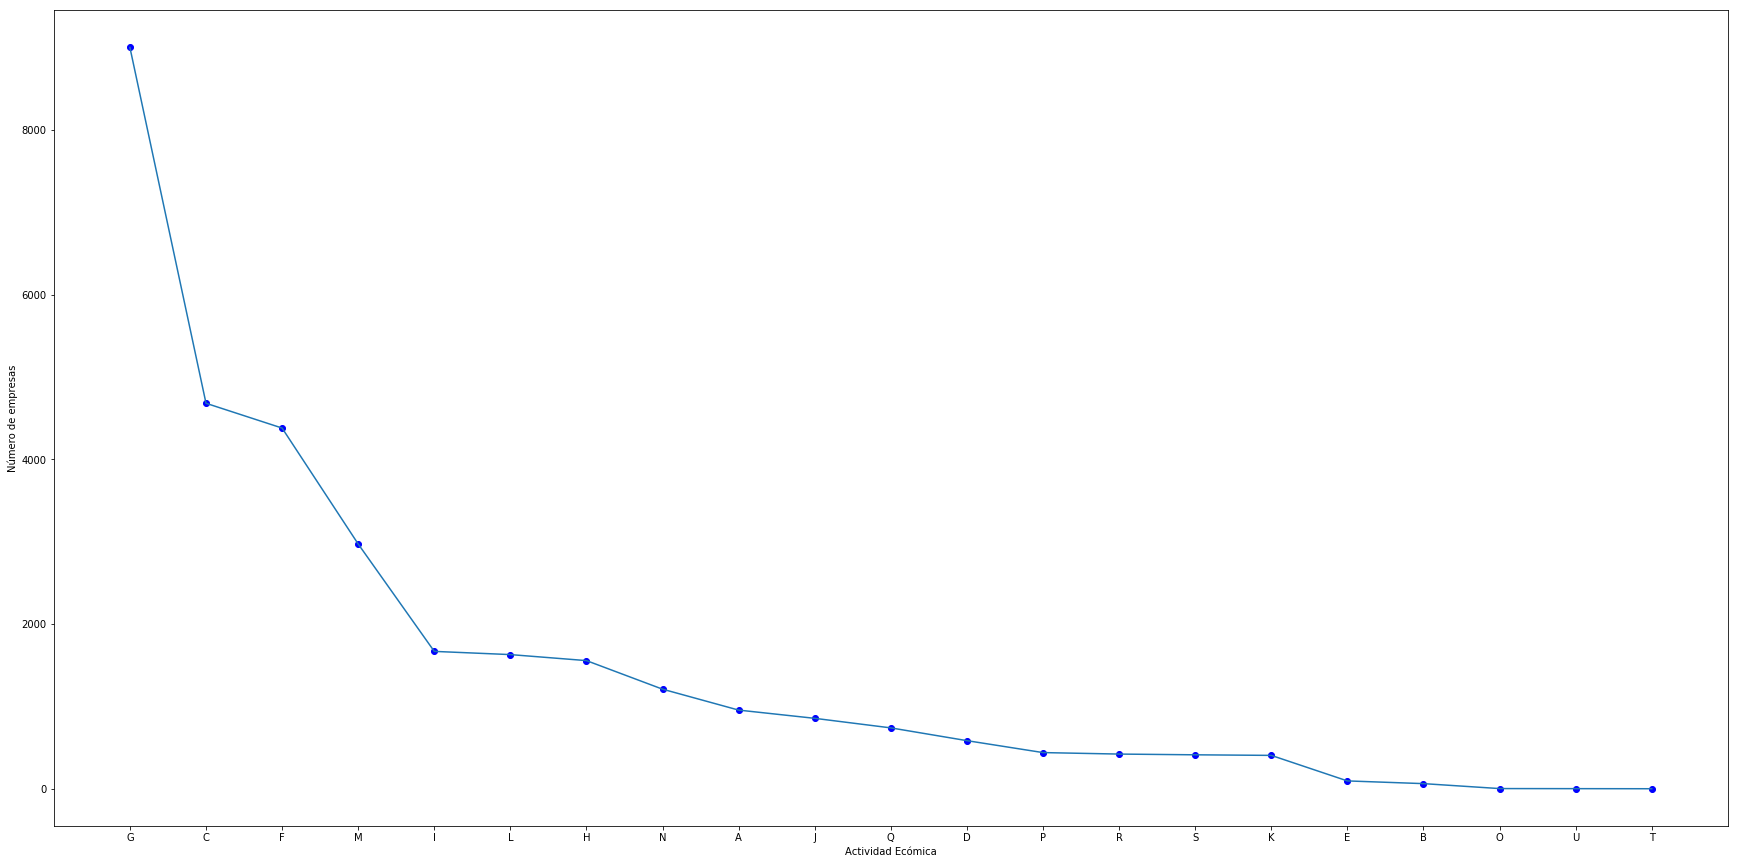

In [19]:
plt.figure(figsize = (30,15))
plt.plot(X_train1['CNAE_Number'].value_counts(),'bo')
plt.plot(X_train1['CNAE_Number'].value_counts())
plt.xlabel('Actividad Ecómica')
plt.ylabel('Número de empresas')
plt.savefig('Estudio de la actividad económica de la empresa')
plt.show()

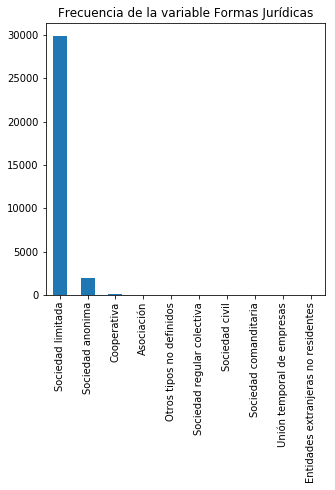

In [13]:
plt.figure(figsize=(5,5))
pd.value_counts(X_train1['Forma jurídica']).plot(kind='bar',
                                                                           x='Actividad económica',
                                                                           y='Numero de empresas',
                                                                           title ='Frecuencia de la variable Formas Jurídicas' )

plt.savefig('Frecuencia de la variable Formas jurídicas')
plt.show()

In [20]:
X_train1['CNAE_Number'].value_counts()

G    9003
C    4682
F    4381
M    2973
I    1669
L    1630
H    1557
N    1210
A     956
J     856
Q     740
D     585
P     440
R     422
S     413
K     406
E      96
B      63
O       3
U       2
T       1
Name: CNAE_Number, dtype: int64

In [21]:
def dummis_variable_Formajuridica(data):
    formas = pd.get_dummies(data['Forma jurídica'])
    cols = list(set(data['Forma jurídica'].value_counts().index) - set(['Sociedad limitada','Sociedad anonima']))
    zeros = np.zeros((data.shape[0],1))
    for i in cols:
        zeros = zeros + formas[i].values.reshape((data.shape[0],1))
        
    return pd.concat([formas[['Sociedad limitada','Sociedad anonima']],
                      pd.DataFrame(zeros.astype(int),columns=['Otras formas juridicas'])],
                      axis=1)

In [22]:
def dummis_variable_CNAE(data):
    CNAE = pd.get_dummies(data['CNAE_Number'])
    cols = list(set(data['CNAE_Number'].value_counts().index) - set(['C','G','F','M','I']))
    zeros = np.zeros((data.shape[0],1))
    for i in cols:
        zeros = zeros + CNAE[i].values.reshape((data.shape[0],1))
    
    return pd.concat([CNAE[['C','G','F','M','I']],
                       pd.DataFrame(zeros.astype(int),columns=['Otras actividades'])],
                       axis=1)

In [23]:
formas_juridicas = dummis_variable_Formajuridica(X_train1)
formas_juridicas.head(5)

,Sociedad limitada,Sociedad anonima,Otras formas juridicas
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [24]:
CNAE = dummis_variable_CNAE(X_train1)
CNAE.head(5)

,C,G,F,M,I,Otras actividades
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,1


In [25]:
X = pd.concat([formas_juridicas,CNAE,prueba],axis=1)
X.head(5)

,Sociedad limitada,Sociedad anonima,Otras formas juridicas,C,G,F,M,I,Otras actividades,Ingresos de explotación EUR Últ. año disp.,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,0,1,0,1,0,0,0,0,0,2029756.0,...,6.840000,13.77,15.88,-7.73,0.09,0.40,-0.01,443.29,63.124768,364.443625
1,0,1,0,1,0,0,0,0,0,3820075.0,...,14.100000,0.36,-10.47,-0.01,0.09,-0.19,-0.46,-34.71,62.330000,30.390000
2,0,1,0,0,0,1,0,0,0,1832508.0,...,10861.741414,16.30,11.62,176.32,5.45,-0.78,6.15,-60.15,170.090000,-58.120000
3,0,1,0,0,1,0,0,0,0,2435823.0,...,-4.870000,-8.71,-9.75,147.87,0.02,-0.19,1.62,44.59,70902.790000,-100.000000
4,0,1,0,0,0,0,0,0,1,782891.0,...,-11.330000,-64.67,-36.50,-19.47,-0.98,-0.41,-0.03,-74.30,-21.390000,-95.150000


In [26]:
X= X.drop(['Total activo EUR Últ. año disp.',
 'Total activo EUR Año - 1',
 'Total activo EUR Año - 2'],axis=1)

In [27]:
y['Estado'][y['Estado'] == 'Concurso'] =0
y['Estado'][y['Estado'] == 'Activa'] =1
y['Estado'] = y['Estado'].astype(int)
y['Estado'].value_counts()

1    29161
0     2927
Name: Estado, dtype: int64

In [28]:
X1 = X[ult_ano(X)]
X1.head()

,Sociedad limitada,Sociedad anonima,Otras formas juridicas,C,G,F,M,I,Otras actividades,Ingresos de explotación EUR Últ. año disp.,...,Resultados antes de impuestos % Últ. año disp.,Consumos de explotación % Últ. año disp.,Gastos de personal % Últ. año disp.,Inmovilizado % Últ. año disp.,Total activo % Últ. año disp.,Fondos propios % Últ. año disp.,Acreedores a largo plazo % Últ. año disp.,Fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Últ. año disp.,Tesorería % Últ. año disp.
0,0,1,0,1,0,0,0,0,0,2029756.0,...,-63.330000,3.45,5.13,23.55,39.11,0.940000,1762.4600,13.77,0.09,443.29
1,0,1,0,1,0,0,0,0,0,3820075.0,...,107.710000,5.04,-1.11,-13.49,-12.76,1.800000,-41.9300,0.36,0.09,-34.71
2,0,1,0,0,0,1,0,0,0,1832508.0,...,725.030000,-21.67,14.36,14.21,-29.80,16.710000,1714.2056,16.30,5.45,-60.15
3,0,1,0,0,1,0,0,0,0,2435823.0,...,-39.860000,-12.76,13.91,6.48,5.80,24.350000,7.0900,-8.71,0.02,44.59
4,0,1,0,0,0,0,0,0,1,782891.0,...,243.139122,-99.83,-50.30,-81.24,-49.27,22.013074,-20.5100,-64.67,-0.98,-74.30


# Selección de variables

In [29]:
class MIFS:
    def __init__(self,beta = 0.5):
        self.beta = beta
        self.dataset = None
        self.column_y = ''
        self.m_im = None
        self.features  = []
        
    def fit(self,X,y, dataset = None, column_y=''):
        if dataset:
            self.dataset = pd.concat([X,y],axis=1)
            self.column_y = column_y
            self.__fit()
        else:
            self.dataset = pd.concat([X,y],axis=1)
            self.column_y = y.name
            self.__fit()
            
            
            
    def __fit(self):
        matriz = []
        for i in self.dataset.columns:
            x = list(self.dataset[i])
            print(i)
            fila = []
            for j in self.dataset.columns:
                y = list(self.dataset[j])
                fila.append(v_measure_score(x,y))
            matriz.append(fila)
    

        m_im = pd.DataFrame(matriz,columns=self.dataset.columns,index=self.dataset.columns)
        self.m_im = m_im
        self.__mifs(m_im)
    
                  
    def __mifs(self,matriz_informacionmuta):
        
        im = 0
        features_candidate = list(self.dataset.columns)
        features_candidate.pop(features_candidate.index(self.column_y))
        features = []
        #features_candidate = columnas
        best_candidate = ['',0.00000000001]
        
        while best_candidate[1] > im:
            best_candidate = ['',0]
            flag = False
            #print(features)
            for i in features_candidate:
                im_p = im + matriz_informacionmuta.loc[i,self.column_y] - (self.beta * sum([matriz_informacionmuta.loc[i,j] for j in features]))
                
                if im_p > best_candidate[1]:
                    best_candidate[0] = i
                    best_candidate[1] = im_p
                    flag = True
                    
            if flag:
                val = features_candidate.pop(features_candidate.index(best_candidate[0]))
                features.append(val)
        self.features = features  
        #return features
    
    def transform(self,X):
        return X[self.features]
        
    
    def fit_transform(self,X,y,dataset=None,column_y = ''):
        self.fit(X,y,dataset = dataset, column_y = column_y)
        return X[self.features]
        

In [30]:
class busquedaWrapper():

    def __init__(self,X,y,model):
        self.X=X
        self.y=y
        self.model=model
        self.features=X.columns
        self.final_features=[]
        
    def fit(self):
        
        from sklearn.model_selection import cross_val_score
        
        new_features=[]
        features_candidate = list(self.features[:])
        best_candidate = ''
        bestlocalscore=0
        bestscore=-1
        
        
        while(bestlocalscore>bestscore):
            
            best_candidate = ''
            #print('hola')
            bestscore=bestlocalscore
            
            for feature in features_candidate:
                
                
                score=cross_val_score(self.model, self.X[new_features + [feature]], self.y, cv=10, scoring="f1")
                
                print('score iteracion:'+str(score.mean())+',mejor score:'+str(bestlocalscore))
                
                if score.mean()>bestlocalscore:
                    bestlocalscore=score.mean()
                    best_candidate = feature
                    
            #print(features_candidate)
            if best_candidate != '':
                print(best_candidate)
                features_candidate.pop(features_candidate.index(best_candidate))
                new_features=new_features + [best_candidate]
            print(features_candidate)
            print('iteraccion terminada')
        self.features=new_features[:]
    
    def transform(self,X = 0):
        if X == 0:
            X = self.X
        return X[self.features]
    
    def fit_transform(self):
        self.fit()
        return self.transform()




In [38]:
def best_beta_mifs(lista_valores,X,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import cross_val_score

    X_best = None
    accuracys = []
    model = GaussianNB()
    best_score = 0
    best_beta = None
    
    for i in lista_valores:
        print(i)
        X_new = MIFS(beta = i).fit_transform(X,y.iloc[:,0])
        
        best_score_p = cross_val_score(model,X_new,y.iloc[:,0],cv=10,scoring='f1').mean()
        accuracys.append(best_score_p)
        
        print(str(best_score)+': mejor vs nuevo :'+str(best_score_p))
        
        if best_score_p > best_score:
            best_beta = i
            X_best = X_new
            best_score = best_score_p
    
    return best_beta,X_best,accuracys

In [33]:
y['Estado'][y['Estado'] =='Activa'] = 1
y['Estado'][y['Estado'] == 'Concurso'] = 0
y['Estado'] = y['Estado'].astype(int)
y.head()

,Estado
0,1
1,1
2,1
3,1
4,0


In [0]:
beta,X_new,acc= best_beta_mifs([0.1,0.05,0.03,0.01,0.005,0.003,0.001],X1,y)

0.1
0: mejor vs nuevo :0.9522618744303124
0.05
0.9522618744303124: mejor vs nuevo :0.9428405345855888
0.03
0.9522618744303124: mejor vs nuevo :0.9428405345855888
0.01
0.9522618744303124: mejor vs nuevo :0.9539542378473703
0.005
0.9539542378473703: mejor vs nuevo :0.9505317745584592
0.003
0.9539542378473703: mejor vs nuevo :0.9527583398304753
0.001
0.9539542378473703: mejor vs nuevo :0.9422899091028933


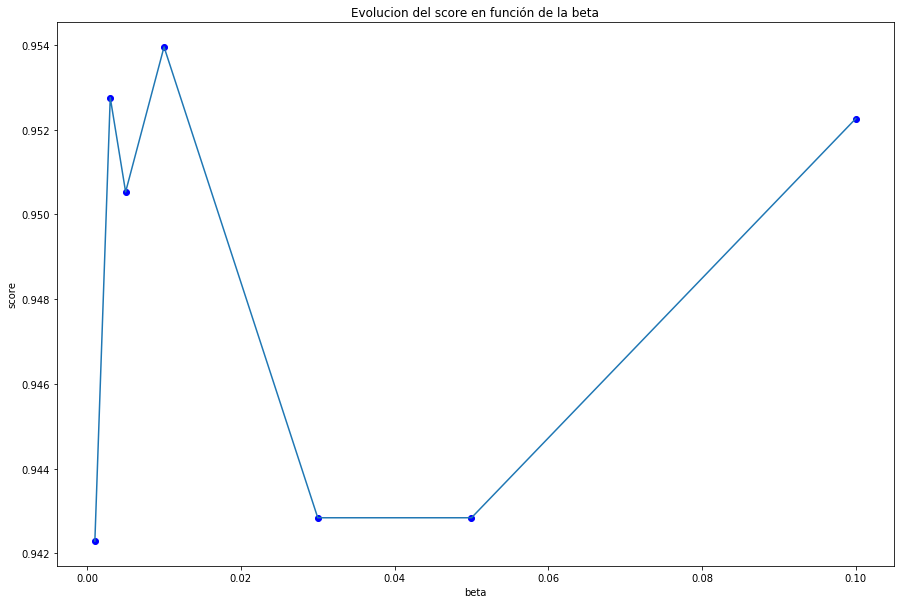

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=((15,10)))
plt.plot([0.1,0.05,0.03,0.01,0.005,0.003,0.001],acc,'bo')
plt.plot([0.1,0.05,0.03,0.01,0.005,0.003,0.001],acc)
plt.xlabel('beta')
plt.ylabel('score')
plt.title('Evolucion del score en función de la beta')
plt.show()

In [0]:
X_new.columns

Index(['Otros pasivos fijos EUR Últ. año disp.',
       'Deudas financieras EUR Últ. año disp.',
       'Total Activo EUR Últ. año disp.',
       'Ingresos financieros EUR Últ. año disp.',
       'Existencias EUR Últ. año disp.', 'Sociedad limitada',
       'Total pasivo y capital propio EUR Últ. año disp.', 'F',
       'Sociedad anonima', 'Other operating items Últ. año disp.',
       'Otras formas juridicas'],
      dtype='object')

In [0]:
select_ = list(X_new.columns)
select_,len(select_)

(['Otros pasivos fijos EUR Últ. año disp.',
  'Deudas financieras EUR Últ. año disp.',
  'Total Activo EUR Últ. año disp.',
  'Ingresos financieros EUR Últ. año disp.',
  'Existencias EUR Últ. año disp.',
  'Sociedad limitada',
  'Total pasivo y capital propio EUR Últ. año disp.',
  'F',
  'Sociedad anonima',
  'Other operating items Últ. año disp.',
  'Otras formas juridicas'],
 11)

In [0]:
columnas_finales = []
for i in select_:
    if 'Últ. año disp.' in i:
        sublist = [i,i[:-15]+' Año - 1',i[:-15]+' Año - 2']
        columnas_finales = columnas_finales+sublist
    else: 
        columnas_finales = columnas_finales + [i]

return columnas_finales

In [36]:
def generar_nombres_columnas(lista):
    columnas_finales = []
    for i in lista:
        sublist = [i+' Últ. año disp.',i+' Año - 1',i+' Año - 2']
        columnas_finales = columnas_finales+sublist


    return columnas_finales

In [ ]:
X_filter = X[columnas_finales] 

In [0]:
from sklearn.naive_bayes import GaussianNB
X_wrapper = busquedaWrapper(X1,y.iloc[:,0],DecisionTreeClassifier(max_depth = 5)).fit_transform()
X_wrapper.shape

score iteracion:0.9216025409538782,mejor score:0
score iteracion:0.9216025409538782,mejor score:0.9216025409538782
score iteracion:0.9522114709955434,mejor score:0.9216025409538782
score iteracion:0.9522114709955434,mejor score:0.9522114709955434
score iteracion:0.9522114709955434,mejor score:0.9522114709955434
score iteracion:0.9522114709955434,mejor score:0.9522114709955434
score iteracion:0.9522114709955434,mejor score:0.9522114709955434
score iteracion:0.9522114709955434,mejor score:0.9522114709955434
score iteracion:0.9522114709955434,mejor score:0.9522114709955434
score iteracion:0.9589983089989195,mejor score:0.9522114709955434
score iteracion:0.9547954587760833,mejor score:0.9589983089989195
score iteracion:0.9543520174794657,mejor score:0.9589983089989195
score iteracion:0.9626370331723256,mejor score:0.9589983089989195
score iteracion:0.9615964860889081,mejor score:0.9626370331723256
score iteracion:0.9522951933928031,mejor score:0.9626370331723256
score iteracion:0.952197223

(32088, 14)

In [0]:
X_wrapper.columns

Index(['Deudas financieras EUR Últ. año disp.',
       'Total Activo EUR Últ. año disp.',
       'Coeficiente de solvencia (%) % Últ. año disp.',
       'Gastos financieros EUR Últ. año disp.',
       'Pasivo líquido EUR Últ. año disp.',
       'Necesidad fondo maniobra % Últ. año disp.',
       'Costes de los trabajadores / Ingresos de explotación (%) % Últ. año disp.',
       'Total activo % Últ. año disp.',
       'Impuestos sobre sociedades EUR Últ. año disp.',
       'Result. ordinarios antes Impuestos EUR Últ. año disp.',
       'EBITDA EUR Últ. año disp.', 'Margen de beneficio (%) % Últ. año disp.',
       'Acreedores a largo plazo % Últ. año disp.',
       'Deudas financieras EUR Últ. año disp.'],
      dtype='object')

In [0]:
set(list(X_wrapper.columns)) - set(select_)

{'Acreedores a largo plazo % Últ. año disp.',
 'Coeficiente de solvencia (%) % Últ. año disp.',
 'Costes de los trabajadores / Ingresos de explotación (%) % Últ. año disp.',
 'EBITDA EUR Últ. año disp.',
 'Gastos financieros EUR Últ. año disp.',
 'Impuestos sobre sociedades EUR Últ. año disp.',
 'Margen de beneficio (%) % Últ. año disp.',
 'Necesidad fondo maniobra % Últ. año disp.',
 'Pasivo líquido EUR Últ. año disp.',
 'Result. ordinarios antes Impuestos EUR Últ. año disp.',
 'Total activo % Últ. año disp.'}

In [0]:
 set(select_) - set(list(X_wrapper.columns))

{'Existencias EUR Últ. año disp.',
 'F',
 'Ingresos financieros EUR Últ. año disp.',
 'Other operating items Últ. año disp.',
 'Otras formas juridicas',
 'Otros pasivos fijos EUR Últ. año disp.',
 'Sociedad anonima',
 'Sociedad limitada',
 'Total pasivo y capital propio EUR Últ. año disp.'}

## Creación de varibles de los expertos

In [71]:
def new_columns(name,name2,X,new_column,sign):
    
    new_data = pd.DataFrame()
    positive = [name+' Últ. año disp.', name+' Año - 1',name+' Año - 2']
    neg = [name2+' Últ. año disp.', name2+' Año - 1',name2+' Año - 2']
    
    for i in range(len(positive)):
        if sign == '+':
            
            if 'Últ. año disp.' in positive[i]:
                new_data[new_column+' Últ. año disp.'] = X[positive[i]] + X[neg[i]]
            else:
                new_data[new_column+positive[i][-8:]] = X[positive[i]] + X[neg[i]]

                
        if sign == '-':
            
            if 'Últ. año disp.' in positive[i]:
                new_data[new_column+' Últ. año disp.'] =  X[positive[i]] - X[neg[i]]
            else:
                new_data[new_column+positive[i][-8:]] = X[positive[i]] - X[neg[i]]

                
        if sign == '/':
            
            if 'Últ. año disp.' in positive[i]:
                new_data[new_column+' Últ. año disp.'] = (X[positive[i]] / X[neg[i]])*100
                
                for j in range(len(new_data[new_column+' Últ. año disp.'])):
                    if new_data[new_column+' Últ. año disp.'].iloc[j] == np.inf:
                        new_data[new_column+' Últ. año disp.'].iloc[j] = X[positive[i]].iloc[j]
                            
            else:

                new_data[new_column+positive[i][-8:]] = (X[positive[i]] / X[neg[i]])*100
                
                for j in range(len(new_data[new_column+positive[i][-8:]])):
                    if new_data[new_column+positive[i][-8:]].iloc[j] == np.inf:
                        new_data[new_column+positive[i][-8:]].iloc[j] = X[positive[i]].iloc[j]
                
      

        if sign == '*':
            
            if 'Últ. año disp.' in positive[i]:
                new_data[new_column+' Últ. año disp.'] = X[positive[i]] * X[neg[i]]
            else:
                new_data[new_column+positive[i][-8:]] = X[positive[i]] * X[neg[i]]

    return new_data
    

In [72]:
# Deuda total =  Pasivo fijo + Pasivo circulante

deuda_total = new_columns('Pasivo fijo EUR','Pasivo líquido EUR',X_train,'Deuda total EUR','+')
# Activo fijo = Activo total + Activo 
activo_fijo = new_columns('Total Activo EUR','Activo circulante EUR',X_train,'Activo fijo EUR','-')

# Gastos de la explotacion = Ingresos de explotacion - Resultado de la explotacion
gastos_explotacion = new_columns('Ingresos de explotación EUR','Resultado Explotación EUR',X_train,'Gastos de explotacion','-')

X = pd.concat([X,deuda_total,activo_fijo,gastos_explotacion],axis=1)

In [73]:
X.head()

,Sociedad limitada,Sociedad anonima,Otras formas juridicas,C,G,F,M,I,Otras actividades,Ingresos de explotación EUR Últ. año disp.,...,Tesorería % Año - 2,Deuda total EUR Últ. año disp.,Deuda total EUR Año - 1,Deuda total EUR Año - 2,Activo fijo EUR Últ. año disp.,Activo fijo EUR Año - 1,Activo fijo EUR Año - 2,Gastos de explotacion Últ. año disp.,Gastos de explotacion Año - 1,Gastos de explotacion Año - 2
0,0,1,0,1,0,0,0,0,0,2029756.0,...,364.443625,1845885.0,1005168.0,749786.0,776708.0,628635.0,567441.0,2002960.0,2000888.0,2116372.0
1,0,1,0,1,0,0,0,0,0,3820075.0,...,30.390000,679218.0,930567.0,955076.0,671818.0,776609.0,830840.0,3734775.0,3558544.0,3599638.0
2,0,1,0,0,0,1,0,0,0,1832508.0,...,-58.120000,444119.0,1239981.0,516943.0,130835.0,114561.0,113327.0,1673240.0,1948339.0,1026979.0
3,0,1,0,0,1,0,0,0,0,2435823.0,...,-100.000000,1904140.0,1915879.0,1531657.0,219692.0,206325.0,232012.0,2368102.0,2600721.0,2155315.0
4,0,1,0,0,0,0,0,0,1,782891.0,...,-95.150000,92254597.0,96786909.0,116212400.0,9800139.0,52247122.0,50376146.0,1432464.0,27532511.0,5408237.0


In [74]:
ratios_conocidos = ['Endeudamiento (%) %','Rentabilidad económica (%) %',
             'Rentabilidad sobre el activo total (%) %',
             'Rentabilidad financiera (%) %','Liquidez general %',
             'Rentabilidad sobre capital empleado (%) %']

numerador = ['Cash flow EUR','Gastos financieros EUR',
            'Activo circulante EUR',
            'Result. ordinarios antes Impuestos EUR',
            'Cash flow EUR',
            'Pasivo líquido EUR',
            'Ingresos de explotación EUR','Activo fijo EUR',
            'Pasivo líquido EUR',
            'Existencias EUR','Fondos propios EUR',
            'Deuda total EUR','Activo fijo EUR','Cash flow EUR','Ingresos de explotación EUR']

denominador = ['Pasivo líquido EUR','Pasivo líquido EUR','Total Activo EUR','Total Activo EUR',
               'Deuda total EUR','Fondos propios EUR','Activo fijo EUR','Pasivo líquido EUR',
               'Total Activo EUR','Ingresos de explotación EUR','Total Activo EUR','Fondos propios EUR',
               'Pasivo fijo EUR','Total Activo EUR','Gastos de explotacion']

names = ['Coeficiente Cashflow (%) %','Gastos financieros sobre el pasivo líquido (%) %','Circulabilidad (%) %',
         'Rentabilidad de la empresa (%) %','Cash flow sobre la deuda total (%) %',
         'Deuda exigible sobre los fondos propios (%) %','Ingresos de explotacion sobre el Activo fijo (%) %',
         'Solvencia sobre la deuda exigible (%) %','Deuda exigible sobre el activo total (%) %',
         'Existencias sobre los Ingresos de explotacion (%) %','Fondos propios sobre el Activo total (%) %',
         'Pasivo total sobre los Fondos propios (%) %','Activo Fijo sobre la deuda a largo plazo (%) %',
         'Cash flow sobre el Activo total (%) %','Ingresos de explotacion sobre los gastos de explotacion (%) %']    

In [75]:
X_expert = pd.DataFrame()
for i in range(15):
    X_expert = pd.concat([X_expert,new_columns(numerador[i],denominador[i],X,names[i],'/')],axis=1)
X_expert = pd.concat([X_expert,X[generar_nombres_columnas(ratios_conocidos)]],axis=1)
X_expert = X_expert.fillna(0)

In [76]:
X_expert.head(5)

,Coeficiente Cashflow (%) % Últ. año disp.,Coeficiente Cashflow (%) % Año - 1,Coeficiente Cashflow (%) % Año - 2,Gastos financieros sobre el pasivo líquido (%) % Últ. año disp.,Gastos financieros sobre el pasivo líquido (%) % Año - 1,Gastos financieros sobre el pasivo líquido (%) % Año - 2,Circulabilidad (%) % Últ. año disp.,Circulabilidad (%) % Año - 1,Circulabilidad (%) % Año - 2,Rentabilidad de la empresa (%) % Últ. año disp.,...,Rentabilidad sobre el activo total (%) % Año - 2,Rentabilidad financiera (%) % Últ. año disp.,Rentabilidad financiera (%) % Año - 1,Rentabilidad financiera (%) % Año - 2,Liquidez general % Últ. año disp.,Liquidez general % Año - 1,Liquidez general % Año - 2,Rentabilidad sobre capital empleado (%) % Últ. año disp.,Rentabilidad sobre capital empleado (%) % Año - 1,Rentabilidad sobre capital empleado (%) % Año - 2
0,1.358295,3.178099,1.383679,1.933689,0.596433,1.076777,74.363763,71.136270,69.678684,0.365346,...,0.51,0.93,2.57,0.85,2.76,1.63,1.90,1.21,2.92,1.43
1,11.549954,10.809097,8.874850,1.162986,0.839780,1.610328,58.193521,57.837283,54.978222,4.877002,...,2.06,8.45,4.14,4.27,1.57,1.35,1.36,8.44,4.20,4.55
2,35.384661,1.421986,1.961171,0.165179,0.119353,0.212746,91.358899,94.688265,92.008572,10.504980,...,0.69,14.87,2.10,1.09,3.15,1.65,2.53,14.86,2.26,1.21
3,4.855583,5.355682,3.548735,0.726830,1.019154,1.089718,91.944636,91.996215,89.077630,2.015784,...,1.16,6.68,13.81,4.16,1.43,1.34,1.37,6.96,13.66,5.37
4,5.187446,-20.172251,-10.330725,4.436439,4.964469,11.454201,81.324370,49.494939,61.616995,4.862671,...,-1.41,-6.41,-144.46,-12.28,0.89,1.24,2.79,107.45,-12.18,1.45


## Creación datasets y comparación de resultados segun el tipo de filtro.

In [30]:
cols_filter = ['Otros pasivos fijos EUR Últ. año disp.',
       'Deudas financieras EUR Últ. año disp.',
       'Total Activo EUR Últ. año disp.',
       'Ingresos financieros EUR Últ. año disp.',
       'Existencias EUR Últ. año disp.', 'Sociedad limitada',
       'Total pasivo y capital propio EUR Últ. año disp.', 'F',
       'Sociedad anonima', 'Other operating items Últ. año disp.',
       'Otras formas juridicas']
cols_wrapper = ['Deudas financieras EUR Últ. año disp.',
       'Total Activo EUR Últ. año disp.',
       'Coeficiente de solvencia (%) % Últ. año disp.',
       'Gastos financieros EUR Últ. año disp.',
       'Pasivo líquido EUR Últ. año disp.',
       'Necesidad fondo maniobra % Últ. año disp.',
       'Costes de los trabajadores / Ingresos de explotación (%) % Últ. año disp.',
       'Total activo % Últ. año disp.',
       'Impuestos sobre sociedades EUR Últ. año disp.',
       'Result. ordinarios antes Impuestos EUR Últ. año disp.',
       'EBITDA EUR Últ. año disp.', 'Margen de beneficio (%) % Últ. año disp.',
       'Acreedores a largo plazo % Últ. año disp.',
       'Deudas financieras EUR Últ. año disp.']


In [31]:
len(cols_filter),len(cols_wrapper)

(11, 14)

In [32]:
def generar_columnas_v2(lista):
    columnas_finales = []
    for i in lista:
        if 'Últ. año disp.' in i:
            sublist = [i,i[:-15]+' Año - 1',i[:-15]+' Año - 2']
            columnas_finales = columnas_finales+sublist
        else: 
            columnas_finales = columnas_finales + [i]

    return columnas_finales

X_filter=X[generar_columnas_v2(cols_filter)]
X_wrapper =X[generar_columnas_v2(cols_wrapper)]
X_filter.head(10)

,Otros pasivos fijos EUR Últ. año disp.,Otros pasivos fijos EUR Año - 1,Otros pasivos fijos EUR Año - 2,Deudas financieras EUR Últ. año disp.,Deudas financieras EUR Año - 1,Deudas financieras EUR Año - 2,Total Activo EUR Últ. año disp.,Total Activo EUR Año - 1,Total Activo EUR Año - 2,Ingresos financieros EUR Últ. año disp.,...,Sociedad limitada,Total pasivo y capital propio EUR Últ. año disp.,Total pasivo y capital propio EUR Año - 1,Total pasivo y capital propio EUR Año - 2,F,Sociedad anonima,Other operating items Últ. año disp.,Other operating items Año - 1,Other operating items Año - 2,Otras formas juridicas
0,0.0,0.0,0.0,21997.0,337238.0,16611.0,3029727.0,2177941.0,1871426.0,31.0,...,0,3029727.0,2177941.0,1871426.0,0,1,-817510.0,-862250.0,-988614.0,0
1,0.0,0.0,0.0,108424.0,258424.0,208424.0,1606971.0,1841933.0,1845418.0,0.0,...,0,1606971.0,1841933.0,1845418.0,0,1,-828101.0,-655272.0,-625228.0,0
2,5200.0,799.0,364.0,51.0,38350.0,75.0,1514101.0,2156753.0,1418107.0,514.0,...,0,1514101.0,2156753.0,1418107.0,1,1,-159325.0,-175158.0,-45903.0,0
3,0.0,0.0,0.0,231700.0,264998.0,249416.0,2727276.0,2577843.0,2124191.0,6.0,...,0,2727276.0,2577843.0,2124191.0,0,1,-95836.0,-98611.0,-98605.0,0
4,957.0,1351.0,36154.0,29927438.0,30634454.0,18554809.0,52475548.0,103449280.0,131245968.0,5335842.0,...,0,52475549.0,103449278.0,131245972.0,0,1,-779433.0,-225049.0,503751.0,0
5,0.0,0.0,0.0,269935.0,271278.0,235606.0,1042123.0,1084354.0,1128621.0,411.0,...,0,1042123.0,1084354.0,1128621.0,0,1,-74286.0,-65376.0,16950.0,0
6,0.0,0.0,0.0,527898.0,504522.0,316718.0,1912827.0,1908166.0,1457948.0,929.0,...,0,1912827.0,1908166.0,1457948.0,0,1,-294581.0,-455302.0,-281640.0,0
7,4728.0,5691.0,6771.0,784705.0,674060.0,615247.0,1869409.0,1784706.0,1546762.0,735.0,...,0,1869409.0,1784706.0,1546762.0,0,1,-337779.0,-244522.0,-130410.0,0
8,0.0,0.0,0.0,41366.0,41366.0,41366.0,2553941.0,2477360.0,2273861.0,0.0,...,0,2553941.0,2477360.0,2273861.0,0,1,-2965695.0,-3057247.0,-2941315.0,0
9,0.0,0.0,0.0,267857.0,216450.0,178554.0,1870242.0,1616137.0,1445243.0,308.0,...,0,1870242.0,1616137.0,1445243.0,0,1,-269192.0,-268308.0,-296809.0,0


In [33]:
X_wrapper.head(10)

,Deudas financieras EUR Últ. año disp.,Deudas financieras EUR Año - 1,Deudas financieras EUR Año - 2,Total Activo EUR Últ. año disp.,Total Activo EUR Año - 1,Total Activo EUR Año - 2,Coeficiente de solvencia (%) % Últ. año disp.,Coeficiente de solvencia (%) % Año - 1,Coeficiente de solvencia (%) % Año - 2,Gastos financieros EUR Últ. año disp.,...,EBITDA EUR Año - 2,Margen de beneficio (%) % Últ. año disp.,Margen de beneficio (%) % Año - 1,Margen de beneficio (%) % Año - 2,Acreedores a largo plazo % Últ. año disp.,Acreedores a largo plazo % Año - 1,Acreedores a largo plazo % Año - 2,Deudas financieras EUR Últ. año disp.,Deudas financieras EUR Año - 1,Deudas financieras EUR Año - 2
0,21997.0,337238.0,16611.0,3029727.0,2177941.0,1871426.0,39.07,53.85,59.94,15758.0,...,16916.0,0.55,1.48,0.45,1762.4600,-11.110000,6.840000,21997.0,337238.0,16611.0
1,108424.0,258424.0,208424.0,1606971.0,1841933.0,1845418.0,57.73,49.48,48.25,6928.0,...,94487.0,2.05,1.05,1.04,-41.9300,-31.420000,14.100000,108424.0,258424.0,208424.0
2,51.0,38350.0,75.0,1514101.0,2156753.0,1418107.0,70.67,42.51,63.55,725.0,...,11692.0,8.68,0.98,0.95,1714.2056,2465.561673,10861.741414,51.0,38350.0,75.0
3,231700.0,264998.0,249416.0,2727276.0,2577843.0,2124191.0,30.18,25.68,27.89,12751.0,...,70107.0,2.26,3.37,1.12,7.0900,-4.880000,-4.870000,231700.0,264998.0,249416.0
4,29927438.0,30634454.0,18554809.0,52475548.0,103449280.0,131245968.0,-75.80,6.44,11.45,2134556.0,...,1340056.0,325.93,-48.48,-27.52,-20.5100,-36.280000,-11.330000,29927438.0,30634454.0,18554809.0
5,269935.0,271278.0,235606.0,1042123.0,1084354.0,1128621.0,10.75,14.74,16.28,6777.0,...,73569.0,-14.46,-3.20,6.22,-11.9400,-10.590000,-28.510000,269935.0,271278.0,235606.0
6,527898.0,504522.0,316718.0,1912827.0,1908166.0,1457948.0,12.64,11.57,11.87,26755.0,...,130023.0,1.32,-7.49,0.22,-17.8300,4.380000,-24.210000,527898.0,504522.0,316718.0
7,784705.0,674060.0,615247.0,1869409.0,1784706.0,1546762.0,26.85,29.26,35.06,33774.0,...,76614.0,0.54,0.64,0.74,4.4500,183.140000,-50.210000,784705.0,674060.0,615247.0
8,41366.0,41366.0,41366.0,2553941.0,2477360.0,2273861.0,45.80,42.86,38.13,3958.0,...,204281.0,2.62,4.64,3.19,1.8500,100.550000,-57.210000,41366.0,41366.0,41366.0
9,267857.0,216450.0,178554.0,1870242.0,1616137.0,1445243.0,29.59,32.48,34.14,52164.0,...,87322.0,1.99,1.78,0.49,17.9700,11.350000,7.780000,267857.0,216450.0,178554.0


In [34]:
y['Estado'][y['Estado'] == 'Activa'] = 1
y['Estado'][y['Estado'] == 'Concurso'] = 0
y['Estado'] = y['Estado'].astype(int)
y.head()

/usr/local/anaconda/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Estado
0,1
1,1
2,1
3,1
4,0


In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

nb = GaussianNB()
models = [GaussianNB(),DecisionTreeClassifier(max_depth=10),LogisticRegression(penalty='l2',tol=0.01,solver='lbfgs',max_iter = 50)]
means = []
for i in models:
    
    cross_filter = cross_val_score(i,X_filter,y.iloc[:,0],cv=10,scoring='f1').mean()
    cross_full = cross_val_score(i,X,y.iloc[:,0],cv=10,scoring='f1').mean()
    cross_wrapper = cross_val_score(i,X_wrapper,y.iloc[:,0],cv=10,scoring='f1').mean()
    cross_expert = cross_val_score(i,X_expert,y.iloc[:,0],cv=10,scoring='f1').mean()

    means.append([cross_filter,cross_full,cross_wrapper,cross_expert])
    
results = pd.DataFrame(means,columns=['Método Filter','Sin seleccion de variables','Metodo Wrapper','Selección por expertos'],
             index=['Naive Bayes','Arbol de decisión','Regresión Logística'])


NameError: name 'X_expert' is not defined

In [ ]:
results

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
fpr_score = make_scorer(f1)



nb = GaussianNB()
models = [GaussianNB(),DecisionTreeClassifier(max_depth=10),LogisticRegression(penalty='l2',tol=0.01,solver='lbfgs',max_iter = 2000)]
means = []
for i in models:
    
    cross_filter = cross_val_score(i,X_filter,y.iloc[:,0],cv=10,scoring=fpr_score).mean()
    cross_full = cross_val_score(i,X,y.iloc[:,0],cv=10,scoring=fpr_score).mean()
    cross_wrapper = cross_val_score(i,X_wrapper,y.iloc[:,0],cv=10,scoring=fpr_score).mean()
    cross_expert = cross_val_score(i,X_expert,y.iloc[:,0],cv=10,scoring=fpr_score).mean()

    means.append([cross_filter,cross_full,cross_wrapper,cross_expert])
    
results = pd.DataFrame(means,columns=['Método Filter','Sin seleccion de variables','Metodo Wrapper','Selección por expertos'],
             index=['Naive Bayes','Arbol de decisión','Regresión Logística'])

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

In [115]:
results

,Método Filter,Sin seleccion de variables,Metodo Wrapper,Selección por expertos
Naive Bayes,0.419800,0.185242,0.295127,0.100943
Arbol de decisión,0.709586,0.730477,0.785714,0.451624
Regresión Logística,0.213076,0.210639,0.173849,0.041591


En general los metodos de selección automática ha sido mejor tanto en Naive Bayes y en los Arboles de decision esto en el caso del método wrapper es normal puesto que su resultado esta sesgado al modelo con el que se hizo la selección, y esto si nos da un margen de mejora. Puesto que la dimensionalidad de los automaticos es baja procederemos a a hacer la union de los dos conjuntos de variabes y ver que resultados nos aportan ya que han sido los mejores en las pruebas.

En todos los casos en media hemos mejorado el caso de Sin seleccion variables y hemos conseguido reducir la dimensionalidad del problema ahora queda ver cual es el mejor conjunto para seguir entrenando con modelos mas complejos. 
Teniendo en cuenta que las varibles de los expertos han tenido una muy buena puntuación se podrian combiar junto con las variables escogidas por el metodo wrapper y filter y volverle a hacer un proceso de selección conjunto combinando metodos filter y wrapper

In [36]:
cols1 = [i for i in list(set(cols_wrapper) - set(cols_filter))]
cols1

['Costes de los trabajadores / Ingresos de explotación (%) % Últ. año disp.',
 'Pasivo líquido EUR Últ. año disp.',
 'Result. ordinarios antes Impuestos EUR Últ. año disp.',
 'Impuestos sobre sociedades EUR Últ. año disp.',
 'Gastos financieros EUR Últ. año disp.',
 'Coeficiente de solvencia (%) % Últ. año disp.',
 'Margen de beneficio (%) % Últ. año disp.',
 'Total activo % Últ. año disp.',
 'EBITDA EUR Últ. año disp.',
 'Acreedores a largo plazo % Últ. año disp.',
 'Necesidad fondo maniobra % Últ. año disp.']

In [37]:
cols2 = [i for i in list(set(cols_filter) - set(cols_wrapper))]
cols2

['Existencias EUR Últ. año disp.',
 'F',
 'Ingresos financieros EUR Últ. año disp.',
 'Sociedad limitada',
 'Total pasivo y capital propio EUR Últ. año disp.',
 'Otros pasivos fijos EUR Últ. año disp.',
 'Otras formas juridicas',
 'Other operating items Últ. año disp.',
 'Sociedad anonima']

In [38]:
cols3 = [i for i in cols_filter if ((i in cols_filter) and (i in cols_wrapper)) ]
cols3

['Deudas financieras EUR Últ. año disp.', 'Total Activo EUR Últ. año disp.']

In [39]:
cols_w_f = cols1 + cols2 + cols3
X_w_f = X[cols_w_f] 
X_w_f.head(5)

,Costes de los trabajadores / Ingresos de explotación (%) % Últ. año disp.,Pasivo líquido EUR Últ. año disp.,Result. ordinarios antes Impuestos EUR Últ. año disp.,Impuestos sobre sociedades EUR Últ. año disp.,Gastos financieros EUR Últ. año disp.,Coeficiente de solvencia (%) % Últ. año disp.,Margen de beneficio (%) % Últ. año disp.,Total activo % Últ. año disp.,EBITDA EUR Últ. año disp.,Acreedores a largo plazo % Últ. año disp.,...,F,Ingresos financieros EUR Últ. año disp.,Sociedad limitada,Total pasivo y capital propio EUR Últ. año disp.,Otros pasivos fijos EUR Últ. año disp.,Otras formas juridicas,Other operating items Últ. año disp.,Sociedad anonima,Deudas financieras EUR Últ. año disp.,Total Activo EUR Últ. año disp.
0,23.27,814919.0,11069.0,22191.367936,15758.0,39.07,0.55,39.11,26796.0,1762.4600,...,0,31.0,0,3029727.0,0.0,0,-817510.0,1,21997.0,3029727.0
1,53.92,595708.0,78372.0,61984.000000,6928.0,57.73,2.05,-12.76,137717.0,-41.9300,...,0,0.0,0,1606971.0,0.0,0,-828101.0,1,108424.0,1606971.0
2,26.99,438919.0,159056.0,5846.000000,725.0,70.67,8.68,-29.80,161368.0,1714.2056,...,1,514.0,0,1514101.0,5200.0,0,-159325.0,1,51.0,1514101.0
3,15.04,1754331.0,54976.0,-4196.000000,12751.0,30.18,2.26,5.80,93732.0,7.0900,...,0,6.0,0,2727276.0,0.0,0,-95836.0,1,231700.0,2727276.0
4,22.25,48114174.0,2551713.0,73554.000000,2134556.0,-75.80,325.93,-49.27,-631835.0,-20.5100,...,0,5335842.0,0,52475549.0,957.0,0,-779433.0,1,29927438.0,52475548.0


Puesto que la dimensionalidad ha disminuido bastante lo que haremos ahora es ver que nos ofrecer mejor resultado si la seleccion hecha por los expertos es mejor o peor que la automatica

In [40]:
cols_auto = generar_columnas_v2(cols_w_f)
X_auto = X[cols_auto]

In [41]:
X_auto.head()

,Costes de los trabajadores / Ingresos de explotación (%) % Últ. año disp.,Costes de los trabajadores / Ingresos de explotación (%) % Año - 1,Costes de los trabajadores / Ingresos de explotación (%) % Año - 2,Pasivo líquido EUR Últ. año disp.,Pasivo líquido EUR Año - 1,Pasivo líquido EUR Año - 2,Result. ordinarios antes Impuestos EUR Últ. año disp.,Result. ordinarios antes Impuestos EUR Año - 1,Result. ordinarios antes Impuestos EUR Año - 2,Impuestos sobre sociedades EUR Últ. año disp.,...,Other operating items Últ. año disp.,Other operating items Año - 1,Other operating items Año - 2,Sociedad anonima,Deudas financieras EUR Últ. año disp.,Deudas financieras EUR Año - 1,Deudas financieras EUR Año - 2,Total Activo EUR Últ. año disp.,Total Activo EUR Año - 1,Total Activo EUR Año - 2
0,23.27,22.06,20.47,814919.0,949813.0,687515.0,11069.0,30186.0,9513.0,22191.367936,...,-817510.0,-862250.0,-988614.0,1,21997.0,337238.0,16611.0,3029727.0,2177941.0,1871426.0
1,53.92,57.81,59.28,595708.0,786754.0,745376.0,78372.0,37732.0,38010.0,61984.000000,...,-828101.0,-655272.0,-625228.0,1,108424.0,258424.0,208424.0,1606971.0,1841933.0,1845418.0
2,26.99,21.97,37.05,438919.0,1239182.0,516579.0,159056.0,19279.0,9831.0,5846.000000,...,-159325.0,-175158.0,-45903.0,1,51.0,38350.0,75.0,1514101.0,2156753.0,1418107.0
3,15.04,11.86,14.05,1754331.0,1775983.0,1384578.0,54976.0,91418.0,24639.0,-4196.000000,...,-95836.0,-98611.0,-98605.0,1,231700.0,264998.0,249416.0,2727276.0,2577843.0,2124191.0
4,22.25,1.77,5.05,48114174.0,41260626.0,29036412.0,2551713.0,-9624173.0,-1845499.0,73554.000000,...,-779433.0,-225049.0,503751.0,1,29927438.0,30634454.0,18554809.0,52475548.0,103449280.0,131245968.0


In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
fpr_score = make_scorer(f1)

cross_GB = cross_val_score(GaussianNB(),X_auto,y.iloc[:,0],cv=10,scoring=fpr_score).mean()
cross_tree = cross_val_score(DecisionTreeClassifier(max_depth=10),X_auto,y.iloc[:,0],cv=10,scoring=fpr_score).mean()
cross_lr = cross_val_score(LogisticRegression(penalty='l2',tol=0.001,solver='lbfgs',max_iter = 3000),
                           X_auto,y.iloc[:,0],cv=10,scoring=fpr_score).mean()

pd.DataFrame([[cross_GB,cross_tree,cross_lr]],columns=['Naive Bayes','Arbol de decisión','Regresión Logística'],
            index = ['Filtro automatico'])

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


,Naive Bayes,Arbol de decisión,Regresión Logística
Filtro automatico,0.275674,0.748173,0.178359


Con este añadido hemos mejorado muchisimo en Naive Bayes aunque en el arbol decisión respecto del wrapper hayamos bajado el rendimiento algo normal puesto que el modelo no esta tan sesgado a las variables pero si hemos mejorado respecto al modelo filter. Ahora seria interesante hacer un filter de las variables de los expertos y ver si al complementarlass al modelo de las variables seleccionadas de manera autoamtica somos capaces de aumentar el acurracy del fpr.

In [116]:
x_expert = X_expert[[i for i in X_expert.columns if 'Últ. año disp.' in i]]
x_expert.head()

,Coeficiente Cashflow (%) % Últ. año disp.,Gastos financieros sobre el pasivo líquido (%) % Últ. año disp.,Circulabilidad (%) % Últ. año disp.,Rentabilidad de la empresa (%) % Últ. año disp.,Cash flow sobre la deuda total (%) % Últ. año disp.,Deuda exigible sobre los fondos propios (%) % Últ. año disp.,Ingresos de explotacion sobre el Activo fijo (%) % Últ. año disp.,Solvencia sobre la deuda exigible (%) % Últ. año disp.,Deuda exigible sobre el activo total (%) % Últ. año disp.,Existencias sobre los Ingresos de explotacion (%) % Últ. año disp.,...,Pasivo total sobre los Fondos propios (%) % Últ. año disp.,Activo Fijo sobre la deuda a largo plazo (%) % Últ. año disp.,Cash flow sobre el Activo total (%) % Últ. año disp.,Ingresos de explotacion sobre los gastos de explotacion (%) % Últ. año disp.,Endeudamiento (%) % Últ. año disp.,Rentabilidad económica (%) % Últ. año disp.,Rentabilidad sobre el activo total (%) % Últ. año disp.,Rentabilidad financiera (%) % Últ. año disp.,Liquidez general % Últ. año disp.,Rentabilidad sobre capital empleado (%) % Últ. año disp.
0,1.358295,1.933689,74.363763,0.365346,0.599658,68.836804,261.328067,95.311068,26.897440,36.236178,...,155.923257,75.337887,0.365346,101.337820,60.93,0.37,0.37,0.93,2.76,1.21
1,11.549954,1.162986,58.193521,4.877002,10.129885,64.209694,568.617542,112.776394,37.070240,12.686034,...,73.211002,804.476111,4.281596,102.283939,42.27,4.88,4.88,8.45,1.57,8.44
2,35.384661,0.165179,91.358899,10.504980,34.970357,41.021157,1400.625215,29.808461,28.988753,31.928264,...,41.507147,2516.057692,10.257572,109.518539,29.33,10.50,10.50,14.87,3.15,14.86
3,4.855583,0.726830,91.944636,2.015784,4.473568,213.127721,1108.744515,12.522836,64.325393,74.599016,...,231.327508,146.648065,3.123373,102.859716,69.82,2.02,2.02,6.68,1.43,6.96
4,5.187446,4.436439,81.324370,4.862671,2.705445,-120.953558,7.988570,20.368507,91.688750,2196.010428,...,-231.917559,22.202186,4.756305,54.653450,175.80,4.86,4.86,-6.41,0.89,107.45


In [117]:
columns_expert = MIFS(beta = 0.01).fit_transform(x_expert,y.iloc[:,0])
columns_expert

Coeficiente Cashflow (%) % Últ. año disp.
Gastos financieros sobre el pasivo líquido (%) % Últ. año disp.
Circulabilidad (%) % Últ. año disp.
Rentabilidad de la empresa (%) % Últ. año disp.
Cash flow sobre la deuda total (%) % Últ. año disp.
Deuda exigible sobre los fondos propios (%) % Últ. año disp.
Ingresos de explotacion sobre el Activo fijo (%) % Últ. año disp.
Solvencia sobre la deuda exigible (%) % Últ. año disp.
Deuda exigible sobre el activo total (%) % Últ. año disp.
Existencias sobre los Ingresos de explotacion (%) % Últ. año disp.
Fondos propios sobre el Activo total (%) % Últ. año disp.
Pasivo total sobre los Fondos propios (%) % Últ. año disp.
Activo Fijo sobre la deuda a largo plazo (%) % Últ. año disp.
Cash flow sobre el Activo total (%) % Últ. año disp.
Ingresos de explotacion sobre los gastos de explotacion (%) % Últ. año disp.
Endeudamiento (%) % Últ. año disp.
Rentabilidad económica (%) % Últ. año disp.
Rentabilidad sobre el activo total (%) % Últ. año disp.
Rentabi

,Existencias sobre los Ingresos de explotacion (%) % Últ. año disp.,Ingresos de explotacion sobre el Activo fijo (%) % Últ. año disp.,Ingresos de explotacion sobre los gastos de explotacion (%) % Últ. año disp.,Fondos propios sobre el Activo total (%) % Últ. año disp.,Coeficiente Cashflow (%) % Últ. año disp.,Cash flow sobre el Activo total (%) % Últ. año disp.
0,36.236178,261.328067,101.337820,39.074214,1.358295,0.365346
1,12.686034,568.617542,102.283939,57.733089,11.549954,4.281596
2,31.928264,1400.625215,109.518539,70.667809,35.384661,10.257572
3,74.599016,1108.744515,102.859716,30.181617,4.855583,3.123373
4,2196.010428,7.988570,54.653450,-75.804922,5.187446,4.756305
5,49.259081,99.802163,88.091487,10.750650,-18.302011,-7.135818
6,16.882668,147.819312,103.033237,12.637944,12.461821,7.890050
7,22.297689,386.635947,102.137435,26.847469,4.812228,2.507958
8,0.274308,323.241124,102.790899,45.804112,18.914525,8.715080
9,32.262333,123.061149,105.955264,29.589807,11.908474,3.275298


In [118]:
cols_expert = generar_columnas_v2(list(columns_expert.columns))
#x_expert = X_expert[cols_expert]
x_final = pd.concat([X_auto,X_expert[cols_expert]],axis=1)
x_final.head(5)

,Impuestos sobre sociedades EUR Últ. año disp.,Impuestos sobre sociedades EUR Año - 1,Impuestos sobre sociedades EUR Año - 2,EBITDA EUR Últ. año disp.,EBITDA EUR Año - 1,EBITDA EUR Año - 2,Costes de los trabajadores / Ingresos de explotación (%) % Últ. año disp.,Costes de los trabajadores / Ingresos de explotación (%) % Año - 1,Costes de los trabajadores / Ingresos de explotación (%) % Año - 2,Acreedores a largo plazo % Últ. año disp.,...,Ingresos de explotacion sobre los gastos de explotacion (%) % Año - 2,Fondos propios sobre el Activo total (%) % Últ. año disp.,Fondos propios sobre el Activo total (%) % Año - 1,Fondos propios sobre el Activo total (%) % Año - 2,Coeficiente Cashflow (%) % Últ. año disp.,Coeficiente Cashflow (%) % Año - 1,Coeficiente Cashflow (%) % Año - 2,Cash flow sobre el Activo total (%) % Últ. año disp.,Cash flow sobre el Activo total (%) % Año - 1,Cash flow sobre el Activo total (%) % Año - 2
0,22191.367936,2.236619e+04,1.430194e+04,26796.0,35851.0,16916.0,23.27,22.06,20.47,1762.4600,...,100.799292,39.074214,53.847832,59.934991,1.358295,3.178099,1.383679,0.365346,1.385988,0.508329
1,61984.000000,1.670900e+04,1.633900e+04,137717.0,108357.0,94487.0,53.92,57.81,59.28,-41.9300,...,101.389223,57.733089,49.478781,48.246143,11.549954,10.809097,8.874850,4.281596,4.616943,3.584608
2,5846.000000,3.420000e+03,9.310000e+02,161368.0,22026.0,11692.0,26.99,21.97,37.05,1714.2056,...,101.018521,70.667809,42.507046,63.546968,35.384661,1.421986,1.961171,10.257572,0.817015,0.714403
3,-4196.000000,2.198800e+04,5.913000e+03,93732.0,135197.0,70107.0,15.04,11.86,14.05,7.0900,...,101.841865,30.181617,25.678988,27.894573,4.855583,5.355682,3.548735,3.123373,3.689751,2.313116
4,73554.000000,-1.252969e+06,1.195587e+06,-631835.0,-7633712.0,1340056.0,22.25,1.77,5.05,-20.5100,...,124.012298,-75.804922,6.440228,11.454502,5.187446,-20.172251,-10.330725,4.756305,-8.045679,-2.285535


In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
fpr_score = make_scorer(f1)

cross_GB = cross_val_score(GaussianNB(),x_final,y.iloc[:,0],cv=10,scoring=fpr_score).mean()
cross_tree = cross_val_score(DecisionTreeClassifier(max_depth=7),x_final,y.iloc[:,0],cv=10,scoring=fpr_score).mean()
cross_lr = cross_val_score(LogisticRegression(penalty='l2',tol=0.001,solver='lbfgs',max_iter = 3000),
                           x_final,y.iloc[:,0],cv=10,scoring=fpr_score).mean()

pd.DataFrame([[cross_GB,cross_tree,cross_lr]],columns=['Naive Bayes','Arbol de decisión','Regresión Logística'],
            index = ['Filtro automatico + Filter expertos'])

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


,Naive Bayes,Arbol de decisión,Regresión Logística
Filtro automatico + Filter expertos,0.232084,0.729038,0.17823


Como no se ha mejorado en ninguno y de hecho se ha empeorado en el naive bayes nos quedaremos finalmente con las variables obtenidas por los metodos automáticos.

# Modelar LSTM

In [40]:
X_auto.columns

Index(['EBITDA EUR Últ. año disp.', 'EBITDA EUR Año - 1', 'EBITDA EUR Año - 2',
       'Margen de beneficio (%) % Últ. año disp.',
       'Margen de beneficio (%) % Año - 1',
       'Margen de beneficio (%) % Año - 2',
       'Impuestos sobre sociedades EUR Últ. año disp.',
       'Impuestos sobre sociedades EUR Año - 1',
       'Impuestos sobre sociedades EUR Año - 2',
       'Necesidad fondo maniobra % Últ. año disp.',
       'Necesidad fondo maniobra % Año - 1',
       'Necesidad fondo maniobra % Año - 2',
       'Result. ordinarios antes Impuestos EUR Últ. año disp.',
       'Result. ordinarios antes Impuestos EUR Año - 1',
       'Result. ordinarios antes Impuestos EUR Año - 2',
       'Acreedores a largo plazo % Últ. año disp.',
       'Acreedores a largo plazo % Año - 1',
       'Acreedores a largo plazo % Año - 2',
       'Coeficiente de solvencia (%) % Últ. año disp.',
       'Coeficiente de solvencia (%) % Año - 1',
       'Coeficiente de solvencia (%) % Año - 2',
       'Pas

In [43]:
def sort_columns(columns):
    columns1 = []
    columns3 = []
    for i in range(len(columns)):
        #print(columns[i])
        if 'Últ. año disp.' in columns[i]:
            #print('primer if')
            columns3 = columns3 + [columns[i],columns[i+1],columns[i+2]]
        elif not(('Últ. año disp.' in columns[i]) or ('Año - 1' in columns[i]) or ('Año - 2' in columns[i] )):
            #print('segundo')
            columns1 = columns1 + [columns[i]]
            
    return columns1 + columns3
            

In [44]:
X_auto = X_auto[sort_columns(list(X_auto.columns))]
X_auto.head(5)

,Sociedad limitada,Otras formas juridicas,Sociedad anonima,F,Total activo % Últ. año disp.,Total activo % Año - 1,Total activo % Año - 2,Impuestos sobre sociedades EUR Últ. año disp.,Impuestos sobre sociedades EUR Año - 1,Impuestos sobre sociedades EUR Año - 2,...,Other operating items Año - 2,Otros pasivos fijos EUR Últ. año disp.,Otros pasivos fijos EUR Año - 1,Otros pasivos fijos EUR Año - 2,Deudas financieras EUR Últ. año disp.,Deudas financieras EUR Año - 1,Deudas financieras EUR Año - 2,Total Activo EUR Últ. año disp.,Total Activo EUR Año - 1,Total Activo EUR Año - 2
0,0,0,1,0,39.11,16.38,-5.58,22191.367936,2.236619e+04,1.430194e+04,...,-988614.0,0.0,0.0,0.0,21997.0,337238.0,16611.0,3029727.0,2177941.0,1871426.0
1,0,0,1,0,-12.76,-0.19,4.49,61984.000000,1.670900e+04,1.633900e+04,...,-625228.0,0.0,0.0,0.0,108424.0,258424.0,208424.0,1606971.0,1841933.0,1845418.0
2,0,0,1,1,-29.80,52.09,-19.80,5846.000000,3.420000e+03,9.310000e+02,...,-45903.0,5200.0,799.0,364.0,51.0,38350.0,75.0,1514101.0,2156753.0,1418107.0
3,0,0,1,0,5.80,21.36,-0.78,-4196.000000,2.198800e+04,5.913000e+03,...,-98605.0,0.0,0.0,0.0,231700.0,264998.0,249416.0,2727276.0,2577843.0,2124191.0
4,0,0,1,0,-49.27,-21.18,-18.15,73554.000000,-1.252969e+06,1.195587e+06,...,503751.0,957.0,1351.0,36154.0,29927438.0,30634454.0,18554809.0,52475548.0,103449280.0,131245968.0


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
X_lstm = pd.DataFrame(scaler.fit_transform(X_auto),columns=X_auto.columns)
X_lstm.head()

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Sociedad limitada,Otras formas juridicas,Sociedad anonima,F,Total activo % Últ. año disp.,Total activo % Año - 1,Total activo % Año - 2,Impuestos sobre sociedades EUR Últ. año disp.,Impuestos sobre sociedades EUR Año - 1,Impuestos sobre sociedades EUR Año - 2,...,Other operating items Año - 2,Otros pasivos fijos EUR Últ. año disp.,Otros pasivos fijos EUR Año - 1,Otros pasivos fijos EUR Año - 2,Deudas financieras EUR Últ. año disp.,Deudas financieras EUR Año - 1,Deudas financieras EUR Año - 2,Total Activo EUR Últ. año disp.,Total Activo EUR Año - 1,Total Activo EUR Año - 2
0,0.0,0.0,1.0,0.0,0.000162,0.000405,0.000161,0.443713,0.272407,0.476104,...,0.991337,0.000000,0.000000,0.000000,5.166222e-05,0.000757,3.760927e-05,0.008560,0.008727,0.007655
1,0.0,0.0,1.0,0.0,0.000102,0.000347,0.000179,0.444274,0.272324,0.476133,...,0.991716,0.000000,0.000000,0.000000,2.546449e-04,0.000580,4.718966e-04,0.004540,0.007379,0.007549
2,0.0,0.0,1.0,1.0,0.000082,0.000531,0.000136,0.443483,0.272131,0.475913,...,0.992319,0.000016,0.000015,0.000007,1.197788e-07,0.000086,1.698089e-07,0.004278,0.008642,0.005800
3,0.0,0.0,1.0,0.0,0.000123,0.000423,0.000170,0.443342,0.272401,0.475984,...,0.992264,0.000000,0.000000,0.000000,5.441714e-04,0.000595,5.647074e-04,0.007706,0.010330,0.008689
4,0.0,0.0,1.0,0.0,0.000059,0.000273,0.000139,0.444437,0.253822,0.493015,...,0.992891,0.000003,0.000026,0.000692,7.028768e-02,0.068767,4.201029e-02,0.148279,0.414776,0.536986


In [47]:
X_lstm.shape

(32088, 58)

In [48]:
def generate_datasets(X):
    ##Crear array por año
    names = (X['Código NIF'].values).reshape((X.shape[0],1))
    features_extra = (X[['Otras formas juridicas','F','Sociedad anonima','Sociedad limitada']].values).reshape((X.shape[0],4))
    X_ult = names
    X_ano1 = names
    X_ano2 = names
    #print(len(X.columns))
    for i in range(5,len(X.columns)):
        resto = (i-5) % 3
        #print('i:'+str(i))
        #print('resto:'+str(resto))
        if resto == 0:
            #print(1)
            X_ult = np.append(X_ult,(X[X.columns[i]].values).reshape((X.shape[0],1)),axis=1)
            
        elif resto == 1:
            #print(2)
            X_ano1 = np.append(X_ano1,(X[X.columns[i]].values).reshape((X.shape[0],1)),axis=1)
        
        elif resto == 2:
            #print(3)
            X_ano2 = np.append(X_ano2,(X[X.columns[i]].values).reshape((X.shape[0],1)),axis=1)
    
    X_ult = np.concatenate((features_extra,X_ult),axis=1)
    print(X_ult.shape)
    
    X_ano1 = np.concatenate((features_extra,X_ano1),axis=1)
    print(X_ano1.shape)
    
    X_ano2 = np.concatenate((features_extra,X_ano2),axis=1)
    print(X_ano2.shape)
    
    print('terminadas columnas')
    X_train = np.concatenate((X_ult,X_ano1,X_ano2),axis=0)
    
    print('terminada concatenacion')
    X_train = np.delete(X_train[X_train[:,4].argsort(kind = 'quicksort')],[4],axis=1)
    #X_train = X_train[X_train[:,0].argsort(kind = 'quicksort')]
    print('terminada ordeancion')
    
    return X_train.reshape(int(X_train.shape[0]/3) , 3 , X_train.shape[1])
    

In [47]:
def fpr(y_act,y_pred):
    from sklearn.metrics import confusion_matrix
    
    matrix = confusion_matrix(y_act,y_pred)
    return matrix[0,0]/(matrix[0,0]+matrix[0,1])
    
def precision(y_act,y_pred):
    from sklearn.metrics import confusion_matrix
    
    matrix = confusion_matrix(y_act,y_pred)
    return matrix[0,0]/(matrix[0,0]+matrix[1,0])

def f1(y_act,y_pred):
    recall = fpr(y_act,y_pred)
    prc = precision(y_act,y_pred)
    return (2*recall*prc)/(recall+prc)


In [50]:
X_lstm = pd.concat([X_train1['Código NIF'],X_lstm],axis=1)
X_lstm.head()

,Código NIF,Sociedad limitada,Otras formas juridicas,Sociedad anonima,F,Total activo % Últ. año disp.,Total activo % Año - 1,Total activo % Año - 2,Impuestos sobre sociedades EUR Últ. año disp.,Impuestos sobre sociedades EUR Año - 1,...,Other operating items Año - 2,Otros pasivos fijos EUR Últ. año disp.,Otros pasivos fijos EUR Año - 1,Otros pasivos fijos EUR Año - 2,Deudas financieras EUR Últ. año disp.,Deudas financieras EUR Año - 1,Deudas financieras EUR Año - 2,Total Activo EUR Últ. año disp.,Total Activo EUR Año - 1,Total Activo EUR Año - 2
0,A01000603,0.0,0.0,1.0,0.0,0.000162,0.000405,0.000161,0.443713,0.272407,...,0.991337,0.000000,0.000000,0.000000,5.166222e-05,0.000757,3.760927e-05,0.008560,0.008727,0.007655
1,A01003904,0.0,0.0,1.0,0.0,0.000102,0.000347,0.000179,0.444274,0.272324,...,0.991716,0.000000,0.000000,0.000000,2.546449e-04,0.000580,4.718966e-04,0.004540,0.007379,0.007549
2,A01006501,0.0,0.0,1.0,1.0,0.000082,0.000531,0.000136,0.443483,0.272131,...,0.992319,0.000016,0.000015,0.000007,1.197788e-07,0.000086,1.698089e-07,0.004278,0.008642,0.005800
3,A01017128,0.0,0.0,1.0,0.0,0.000123,0.000423,0.000170,0.443342,0.272401,...,0.992264,0.000000,0.000000,0.000000,5.441714e-04,0.000595,5.647074e-04,0.007706,0.010330,0.008689
4,A01019546,0.0,0.0,1.0,0.0,0.000059,0.000273,0.000139,0.444437,0.253822,...,0.992891,0.000003,0.000026,0.000692,7.028768e-02,0.068767,4.201029e-02,0.148279,0.414776,0.536986


In [51]:
X_lstm = generate_datasets(X_lstm)

(32088, 23)
(32088, 23)
(32088, 23)
terminadas columnas
terminada concatenacion
terminada ordeancion


In [52]:
X_lstm[1,0].shape

(22,)

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras
from keras.utils import to_categorical


Using TensorFlow backend.


In [57]:
X_lstm.shape

NameError: name 'X_lstm' is not defined

In [58]:
class_weight = {
    0:1.4,
    1:0.1
    
}

In [59]:
def exp_decay(epoch):
    from numpy import exp
    initial_lrate = 0.001
    k = 0.3
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))

loss_history = LossHistory()

lrate = keras.callbacks.LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lrate]

In [60]:
target = to_categorical(y.values)

In [61]:
y.values

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [62]:
target

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [64]:
import keras
from keras import backend as K

def threshold_binary_accuracy(y_true, y_pred):
    threshold = 0.85
    if K.backend() == 'tensorflow':
        #return K.mean(K.equal(y_true,K.tf.cast(y_pred >= threshold, y_true.dtype)))
        #return K.equal(y_true,K.tf.cast(y_pred >= threshold, y_true.dtype))
        y_pr = K.tf.cast(y_pred[:,0] < threshold, y_pred.dtype)
        y_tr = K.tf.cast(y_true[:,0] <= 0, y_true.dtype)
        return K.mean(K.equal(y_tr,y_pr))
def predict_threshold_binary_accuracy(y_pred):
    
    threshold = 0.85
    
    return K.tf.cast(y_pred[:,0] < threshold, y_pred.dtype)
    
print(K.backend())

a_pred = K.variable([[.7,.3],[.4, .6], [.2, .8]])
a_true = K.variable([[0., 1.], [0.,  1.], [1., 0.]])

#print (K.eval(keras.metrics.binary_accuracy(a_true, a_pred)))
print (K.eval(threshold_binary_accuracy(a_true, a_pred)))

tensorflow
0.6666667


In [173]:
lstm_model = Sequential()
lstm_model.add(LSTM(200, batch_input_shape=(191,3,X_lstm.shape[2]),
                    return_sequences=True))
lstm_model.add(LSTM(100,return_sequences=True))
#lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(50,return_sequences=True))
#lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(25,return_sequences=True))
#lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(10,return_sequences=True))
lstm_model.add(LSTM(3))
#lstm_model.add(Dense(10,activation='linear',kernel_initializer='zeros'))
lstm_model.add(Dense(2,activation='softmax'))


optimizer = keras.optimizers.Adam(lr=0.001)

lstm_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[threshold_binary_accuracy])

lstm_model.fit(X_lstm,target, epochs=30, batch_size = 191, class_weight = class_weight, callbacks = callbacks_list, verbose = 2 )

Epoch 1/30
 - 16s - loss: 0.1444 - threshold_binary_accuracy: 0.9088
Epoch 2/30
 - 6s - loss: 0.1381 - threshold_binary_accuracy: 0.9091
Epoch 3/30
 - 6s - loss: 0.1322 - threshold_binary_accuracy: 0.8918
Epoch 4/30
 - 6s - loss: 0.1258 - threshold_binary_accuracy: 0.9217
Epoch 5/30
 - 6s - loss: 0.1228 - threshold_binary_accuracy: 0.9241
Epoch 6/30
 - 6s - loss: 0.1225 - threshold_binary_accuracy: 0.9252
Epoch 7/30
 - 6s - loss: 0.1209 - threshold_binary_accuracy: 0.9256
Epoch 8/30
 - 6s - loss: 0.1211 - threshold_binary_accuracy: 0.9245
Epoch 9/30
 - 6s - loss: 0.1202 - threshold_binary_accuracy: 0.9255
Epoch 10/30
 - 6s - loss: 0.1203 - threshold_binary_accuracy: 0.9249
Epoch 11/30
 - 6s - loss: 0.1199 - threshold_binary_accuracy: 0.9260
Epoch 12/30
 - 6s - loss: 0.1198 - threshold_binary_accuracy: 0.9252
Epoch 13/30
 - 6s - loss: 0.1197 - threshold_binary_accuracy: 0.9252
Epoch 14/30
 - 6s - loss: 0.1198 - threshold_binary_accuracy: 0.9247
Epoch 15/30
 - 6s - loss: 0.1197 - thresho

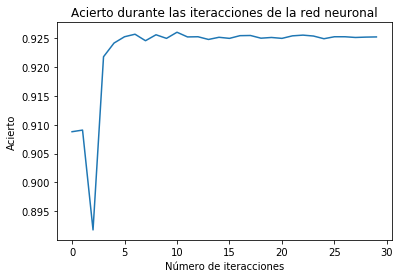

In [174]:
plt.plot(lstm_model.history.history['threshold_binary_accuracy'])
plt.title('Acierto durante las iteracciones de la red neuronal')
plt.xlabel('Número de iteracciones')
plt.ylabel('Acierto')
#plt.savefig('Acierto_rnn.png')
plt.show()

Text(0, 0.5, 'Acierto')

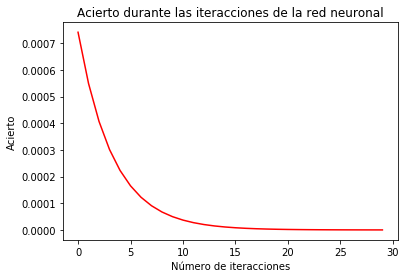

In [165]:
import matplotlib.pyplot as plt

plt.plot(loss_history.lr,'r')
plt.title('')#
plt.xlabel('Número de iteracciones')
plt.ylabel('Acierto')
plt.show()

Text(0, 0.5, 'Acierto')

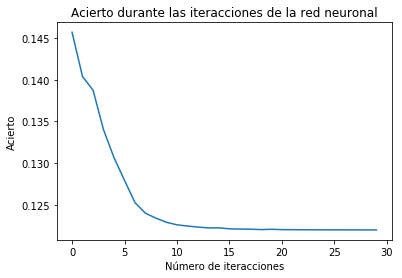

In [166]:
plt.plot(loss_history.losses)
plt.title('Fúnción de perdida a lo largo de las iteracciones')
plt.xlabel('Número de iteracciones')
plt.ylabel('Función de perdida')
plt.show()

In [193]:
predicts = lstm_model.predict(X_lstm, batch_size=191)

In [194]:
import tensorflow as tf
#predicts = lstm_model.predict(X_lstm, batch_size=191)
session = tf.Session()

predicts = predict_threshold_binary_accuracy(predicts).eval(session = session)

In [195]:
predicts.reshape((y.values.shape[0],1))

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [63]:
y.values

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [196]:
f1(y['Estado'],predicts.reshape((y.values.shape[0],1)))

0.45238578680203045

In [197]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y.values,predicts.reshape((y.values.shape[0],1)))

array([[ 1114,  1813],
       [  884, 28277]])

## CN2 SISTEMA BASADO EN REGLAS

In [209]:
from copy import copy
y_reglas = y.copy()
y_reglas['Estado'][y_reglas['Estado'] == 1] ='Activa' 
y_reglas['Estado'][y_reglas['Estado'] == 0] ='Concurso'  
y_reglas['Estado'] = y_reglas['Estado'].astype('object')
y_reglas.head()

,Estado
0,Activa
1,Activa
2,Activa
3,Activa
4,Concurso


In [210]:
prueba = pd.concat([y_reglas,X_expert],axis=1)
prueba.head()

,Estado,Coeficiente Cashflow (%) % Últ. año disp.,Coeficiente Cashflow (%) % Año - 1,Coeficiente Cashflow (%) % Año - 2,Gastos financieros sobre el pasivo líquido (%) % Últ. año disp.,Gastos financieros sobre el pasivo líquido (%) % Año - 1,Gastos financieros sobre el pasivo líquido (%) % Año - 2,Circulabilidad (%) % Últ. año disp.,Circulabilidad (%) % Año - 1,Circulabilidad (%) % Año - 2,...,Rentabilidad sobre el activo total (%) % Año - 2,Rentabilidad financiera (%) % Últ. año disp.,Rentabilidad financiera (%) % Año - 1,Rentabilidad financiera (%) % Año - 2,Liquidez general % Últ. año disp.,Liquidez general % Año - 1,Liquidez general % Año - 2,Rentabilidad sobre capital empleado (%) % Últ. año disp.,Rentabilidad sobre capital empleado (%) % Año - 1,Rentabilidad sobre capital empleado (%) % Año - 2
0,Activa,1.358295,3.178099,1.383679,1.933689,0.596433,1.076777,74.363763,71.136270,69.678684,...,0.51,0.93,2.57,0.85,2.76,1.63,1.90,1.21,2.92,1.43
1,Activa,11.549954,10.809097,8.874850,1.162986,0.839780,1.610328,58.193521,57.837283,54.978222,...,2.06,8.45,4.14,4.27,1.57,1.35,1.36,8.44,4.20,4.55
2,Activa,35.384661,1.421986,1.961171,0.165179,0.119353,0.212746,91.358899,94.688265,92.008572,...,0.69,14.87,2.10,1.09,3.15,1.65,2.53,14.86,2.26,1.21
3,Activa,4.855583,5.355682,3.548735,0.726830,1.019154,1.089718,91.944636,91.996215,89.077630,...,1.16,6.68,13.81,4.16,1.43,1.34,1.37,6.96,13.66,5.37
4,Concurso,5.187446,-20.172251,-10.330725,4.436439,4.964469,11.454201,81.324370,49.494939,61.616995,...,-1.41,-6.41,-144.46,-12.28,0.89,1.24,2.79,107.45,-12.18,1.45


In [211]:
import Orange 

In [212]:
indices_act = list(prueba[prueba['Estado'] == 'Activa'].index)
indices_con = list(prueba[prueba['Estado'] == 'Concurso'].index)


np.random.shuffle(indices_act)
np.random.shuffle(indices_con)

indices_total = indices_act[:3000] + indices_con

np.random.shuffle(indices_total)

prueba = prueba.iloc[indices_total,:]
prueba.shape

(5927, 64)

In [213]:
prueba.to_csv('prueba.csv',index=False)

In [214]:
prueba['Estado'] = prueba['Estado'].astype('category')

In [215]:
continous = list(prueba.columns[1:])

In [216]:
from Orange.data import Domain,DiscreteVariable,ContinuousVariable
domain = Domain([ContinuousVariable.make(i) for i in continous],
                 DiscreteVariable.make('Estado',values=['Activa','Concurso']))
domain

[Coeficiente Cashflow (%) % Últ. año disp., Coeficiente Cashflow (%) % Año - 1, Coeficiente Cashflow (%) % Año - 2, Gastos financieros sobre el pasivo líquido (%) % Últ. año disp., Gastos financieros sobre el pasivo líquido (%) % Año - 1, Gastos financieros sobre el pasivo líquido (%) % Año - 2, Circulabilidad (%) % Últ. año disp., Circulabilidad (%) % Año - 1, Circulabilidad (%) % Año - 2, Rentabilidad de la empresa (%) % Últ. año disp., Rentabilidad de la empresa (%) % Año - 1, Rentabilidad de la empresa (%) % Año - 2, Cash flow sobre la deuda total (%) % Últ. año disp., Cash flow sobre la deuda total (%) % Año - 1, Cash flow sobre la deuda total (%) % Año - 2, Deuda exigible sobre los fondos propios (%) % Últ. año disp., Deuda exigible sobre los fondos propios (%) % Año - 1, Deuda exigible sobre los fondos propios (%) % Año - 2, Ingresos de explotacion sobre el Activo fijo (%) % Últ. año disp., Ingresos de explotacion sobre el Activo fijo (%) % Año - 1, Ingresos de explotacion sobre

In [217]:
table=Orange.data.Table.from_file('prueba.csv')

In [218]:
table_finish = Orange.data.Table.from_table(domain,table)

In [219]:
table_finish.domain.class_var

DiscreteVariable(name='Estado', values=['Activa', 'Concurso'])

In [220]:
table_finish

[[-13.1556, -9.45207, 6.818, 0.175521, 0.153549, ... | Activa],
 [9.27329, 8.12356, 5.80289, 12.3772, 10.5507, ... | Concurso],
 [1.77512, 3.64086, 5.822, 10.5903, 8.80217, ... | Concurso],
 [17.1907, 14.3222, 13.8977, 5.70972, 3.88548, ... | Concurso],
 [7.47051, 7.09858, 7.29922, 1.95931, 1.19152, ... | Concurso],
 ...
]

In [223]:
import Orange
#Orange.classification.rules.LaplaceAccuracyEvaluator
# construct the learning algorithm and use it to induce a classifier
learner = Orange.classification.CN2Learner()
learner.rule_finder.search_algorithm.beam_width = 10
#Orange.classification.CN2Classifier
#classifier = learner(table_finish)

learner.rule_finder.general_validator.min_covered_examples = 1000

classifier = learner(table_finish)
# All rule-base classifiers can have their rules printed out like this:
for rule in classifier.rule_list:
    print(rule, rule.curr_class_dist.tolist())

IF Cash flow sobre el Activo total (%) % Últ. año disp.<=0.7238728241142312 AND Rentabilidad económica (%) % Año - 1<=0.02 AND Rentabilidad económica (%) % Últ. año disp.<=0.18 AND Rentabilidad de la empresa (%) % Año - 2<=142.00076527358533 AND Cash flow sobre la deuda total (%) % Año - 1<=353.1044892788313 THEN Estado=Concurso  [90, 911]
IF Cash flow sobre la deuda total (%) % Últ. año disp.>=11.470148050931362 AND Rentabilidad financiera (%) % Últ. año disp.<=56.45 AND Rentabilidad financiera (%) % Últ. año disp.>=0.02 AND Deuda exigible sobre el activo total (%) % Año - 2<=100.1340088249714 AND Liquidez general % Año - 2<=128.18 THEN Estado=Activa  [842, 158]
IF Endeudamiento (%) % Año - 2<=78.22 AND Gastos financieros sobre el pasivo líquido (%) % Últ. año disp.<=5.3088728579248015 AND Fondos propios sobre el Activo total (%) % Últ. año disp.>=12.158656293172399 AND Deuda exigible sobre el activo total (%) % Año - 2<=78.21881626427589 AND Deuda exigible sobre el activo total (%) %

## Perceptron

In [ ]:
y['Estado'][y['Estado'] == 'Concurso'] =0
y['Estado'][y['Estado'] == 'Activa'] =1
y['Estado'] = y['Estado'].astype(int)
y['Estado'].value_counts()

In [228]:
scaler = MinMaxScaler()
X_scaler = pd.DataFrame(scaler.fit_transform(X_auto),columns=X_auto.columns)
X_scaler.head()

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,F,Sociedad limitada,Sociedad anonima,Otras formas juridicas,Impuestos sobre sociedades EUR Últ. año disp.,Impuestos sobre sociedades EUR Año - 1,Impuestos sobre sociedades EUR Año - 2,EBITDA EUR Últ. año disp.,EBITDA EUR Año - 1,EBITDA EUR Año - 2,...,Otros pasivos fijos EUR Año - 2,Other operating items Últ. año disp.,Other operating items Año - 1,Other operating items Año - 2,Deudas financieras EUR Últ. año disp.,Deudas financieras EUR Año - 1,Deudas financieras EUR Año - 2,Total Activo EUR Últ. año disp.,Total Activo EUR Año - 1,Total Activo EUR Año - 2
0,0.0,0.0,1.0,0.0,0.443713,0.272407,0.476104,0.372326,0.539627,0.321890,...,0.000000,0.824467,0.846936,0.991337,5.166222e-05,0.000757,3.760927e-05,0.008560,0.008727,0.007655
1,0.0,0.0,1.0,0.0,0.444274,0.272324,0.476133,0.372601,0.539755,0.322078,...,0.000000,0.824384,0.847509,0.991716,2.546449e-04,0.000580,4.718966e-04,0.004540,0.007379,0.007549
2,1.0,0.0,1.0,0.0,0.443483,0.272131,0.475913,0.372659,0.539602,0.321877,...,0.000007,0.829584,0.848837,0.992319,1.197788e-07,0.000086,1.698089e-07,0.004278,0.008642,0.005800
3,0.0,0.0,1.0,0.0,0.443342,0.272401,0.475984,0.372492,0.539802,0.322019,...,0.000000,0.830077,0.849049,0.992264,5.441714e-04,0.000595,5.647074e-04,0.007706,0.010330,0.008689
4,0.0,0.0,1.0,0.0,0.444437,0.253822,0.493015,0.370694,0.526064,0.325102,...,0.000692,0.824763,0.848699,0.992891,7.028768e-02,0.068767,4.201029e-02,0.148279,0.414776,0.536986


In [235]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
fpr_score = make_scorer(f1)

cross_val_score(MLPClassifier(hidden_layer_sizes=(20,10)),X_auto,y['Estado'].astype(np.int),cv=15,scoring=fpr_score)

array([0.01015228, 0.25830258, 0.41025641, 0.30898876, 0.36913767,
       0.01010101, 0.33932584, 0.01020408, 0.23433686, 0.03960396,
       0.22026432, 0.08780488, 0.03      , 0.36864407, 0.35315315])

Mismo puntuacion que la LSTM.

## ALGORITMO GENETICO PARA LA CREACIÓN DE NUEVAS VARIBLES

In [41]:
from gplearn.genetic import SymbolicTransformer


function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
gp = SymbolicTransformer(generations=40, population_size=20000,
                         hall_of_fame=100, n_components=12,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3,feature_names=list(X_auto.columns))

In [42]:
gp = gp.fit(X_auto,y['Estado'])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.29        0.0710906        4         0.417203         0.437426     39.84m
   1     6.59         0.239762       24         0.433651         0.415192     51.99m
   2     4.77         0.345498       19         0.443766         0.413071     41.31m
   3     4.33         0.372268       26         0.462811          0.40361     27.14m
   4     8.51         0.362163       17         0.466253         0.471134     31.84m
   5    14.74         0.360318       29         0.500889          0.47971     44.42m
   6    20.26         0.373357       27         0.501872         0.473535     54.80m
   7    21.06         0.375035       49         0.517505         0.517716     57.87m
   8    23.98         0.379523       42         0.532769           0.5265  

In [59]:
from sklearn.externals import joblib
joblib.dump(gp,'models/trans_genetic.pkl')

['models/trans_genetic.pkl']

In [45]:
from sklearn.externals import joblib
gp_extra = joblib.load('models/trans_genetic.pkl')

In [43]:
data = gp.transform(X_auto)

In [44]:
for i in gp._best_programs:
    print(i)

sqrt(mul(add(log(Deudas financieras EUR Año - 2), log(Otros pasivos fijos EUR Año - 2)), mul(add(log(Deudas financieras EUR Año - 2), log(max(sub(sqrt(mul(Necesidad fondo maniobra % Últ. año disp., Result. ordinarios antes Impuestos EUR Año - 1)), Result. ordinarios antes Impuestos EUR Año - 1), mul(F, Ingresos financieros EUR Año - 2)))), sqrt(abs(mul(log(Deudas financieras EUR Año - 2), mul(add(add(log(Deudas financieras EUR Últ. año disp.), sqrt(Total activo % Año - 2)), sqrt(Total activo % Año - 2)), sqrt(max(Total pasivo y capital propio EUR Últ. año disp., abs(max(Total pasivo y capital propio EUR Últ. año disp., abs(add(Total Activo EUR Año - 2, mul(add(sub(sqrt(mul(Necesidad fondo maniobra % Últ. año disp., Result. ordinarios antes Impuestos EUR Año - 1)), neg(Total pasivo y capital propio EUR Año - 2)), neg(Total Activo EUR Últ. año disp.)), add(log(Deudas financieras EUR Últ. año disp.), log(mul(Total activo % Año - 2, Ingresos financieros EUR Año - 2)))))))))))))))))
sqrt(mu

In [45]:
data.shape

(32088, 12)

In [49]:
pd.DataFrame(data,columns=[i for i in range(12)]).to_csv('data_genetic3.csv',index=False)

In [53]:
data = pd.read_csv('data_genetic1.csv')

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
fpr_score = make_scorer(f1)

cross_GB = cross_val_score(GaussianNB(),data,y.iloc[:,0],cv=10,scoring=fpr_score).mean()
cross_tree = cross_val_score(DecisionTreeClassifier(max_depth=7),data,y.iloc[:,0],cv=10,scoring=fpr_score).mean()
cross_lr = cross_val_score(LogisticRegression(penalty='l2',tol=0.001,solver='lbfgs',max_iter = 3000),
                           data,y.iloc[:,0],cv=10,scoring=fpr_score).mean()

pd.DataFrame([[cross_GB,cross_tree,cross_lr]],columns=['Naive Bayes','Arbol de decisión','Regresión Logística'],
            index = ['Genetico'])

,Naive Bayes,Arbol de decisión,Regresión Logística
Genetico,0.600772,0.605732,0.618489


In [67]:
lstm_model = Sequential()

lstm_model.add(Dense(264,activation='tanh'))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(128,activation='tanh'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(64,activation = 'tanh'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(16,activation = 'tanh'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(2,activation='softmax'))


optimizer = keras.optimizers.Adam(lr=0.001)

lstm_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[threshold_binary_accuracy])

lstm_model.fit(data,target, epochs=30, batch_size = 382, class_weight = class_weight, callbacks = callbacks_list, verbose = 2 )

Epoch 1/30
 - 1s - loss: 0.1516 - threshold_binary_accuracy: 0.8707
Epoch 2/30
 - 0s - loss: 0.1380 - threshold_binary_accuracy: 0.8879
Epoch 3/30
 - 0s - loss: 0.1328 - threshold_binary_accuracy: 0.8949
Epoch 4/30
 - 0s - loss: 0.1316 - threshold_binary_accuracy: 0.8924
Epoch 5/30
 - 0s - loss: 0.1304 - threshold_binary_accuracy: 0.8917
Epoch 6/30
 - 0s - loss: 0.1285 - threshold_binary_accuracy: 0.8904
Epoch 7/30
 - 1s - loss: 0.1276 - threshold_binary_accuracy: 0.8915
Epoch 8/30
 - 0s - loss: 0.1265 - threshold_binary_accuracy: 0.8934
Epoch 9/30
 - 0s - loss: 0.1258 - threshold_binary_accuracy: 0.8945
Epoch 10/30
 - 0s - loss: 0.1262 - threshold_binary_accuracy: 0.8943
Epoch 11/30
 - 1s - loss: 0.1260 - threshold_binary_accuracy: 0.8927
Epoch 12/30
 - 0s - loss: 0.1255 - threshold_binary_accuracy: 0.8940
Epoch 13/30
 - 0s - loss: 0.1262 - threshold_binary_accuracy: 0.8936
Epoch 14/30
 - 0s - loss: 0.1257 - threshold_binary_accuracy: 0.8939
Epoch 15/30
 - 0s - loss: 0.1260 - threshol

In [68]:
import tensorflow as tf
predicts = lstm_model.predict(data, batch_size=191)
session = tf.Session()

predicts = predict_threshold_binary_accuracy(predicts).eval(session = session)

print(f1(y['Estado'],predicts.reshape((y.values.shape[0],1))))
from sklearn.metrics import confusion_matrix
confusion_matrix(y.values,predicts.reshape((y.values.shape[0],1)))

0.4183342347214711


array([[ 1547,  1380],
       [ 2922, 26239]])

## Importar val y probar los mejores parametros para dataset

In [37]:
from sklearn.metrics import make_scorer
fpr_score = make_scorer(f1)

In [102]:
X_val = pd.read_csv('../Datasets/Datasets Finales/X_val_sn_v5.csv')
y_val = pd.read_csv('../Datasets/Datasets Finales/Y_valv5.csv')

In [118]:
y_val['Estado'][y_val['Estado'] == 'Concurso'] =0
y_val['Estado'][y_val['Estado'] == 'Activa'] =1
y_val['Estado'] = y_val['Estado'].astype(int)
y_val['Estado'].value_counts()

1    9720
0     976
Name: Estado, dtype: int64

In [121]:
y_val.values

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [120]:
target_val = to_categorical(y_val.values)
target_val

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [103]:
X_val.head(5)

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Código primario CNAE 2009,Ult. año disponible,CNAE_Number,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,ALMACENES CAYPE SA,VITORIA-GASTEIZ,País Vasco,A01036102,Sociedad anonima,4762.0,2017.0,G,4330426.0,4122111.0,...,-8.61,-19.98,-4.31,-7.89,-0.21,-0.04,-0.13,-11.04,983.824617,317.922087
1,PINTURAS ATENA SA,VITORIA-GASTEIZ,País Vasco,A01038017,Sociedad anonima,4334.0,2016.0,F,481905.0,426995.0,...,-24.25,-7.42,-8.49,-7.09,-0.10,-0.02,0.05,-100.00,-68.660000,-7.580000
2,BODEGAS ZUGOBER SA.,LAPUEBLA DE LABARCA,País Vasco,A01042209,Sociedad anonima,1102.0,2017.0,C,803212.0,669660.0,...,-13.67,19.60,14.83,13.20,0.15,0.10,0.15,-38.96,-8.140000,173.020000
3,SISTEMAS DE OFICINA DE ALAVA SA,VITORIA-GASTEIZ,País Vasco,A01055367,Sociedad anonima,4666.0,2017.0,G,1230560.0,1046599.0,...,255.45,30.38,8.68,1.80,0.42,0.04,-0.08,138.47,-40.330000,92.240000
4,EXTRUSISTEM SA,VITORIA-GASTEIZ,País Vasco,A01334762,Sociedad anonima,2229.0,2017.0,C,1583803.0,1601113.0,...,-12.14,37.95,61.97,-25.54,1.11,2.24,0.00,157.91,-28.230000,-63.940000


In [106]:
X_val = X_val[X_train1.columns]
X_val.head()

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Código primario CNAE 2009,Ult. año disponible,CNAE_Number,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,ALMACENES CAYPE SA,VITORIA-GASTEIZ,País Vasco,A01036102,Sociedad anonima,4762.0,2017.0,G,4330426.0,4122111.0,...,-8.61,-19.98,-4.31,-7.89,-0.21,-0.04,-0.13,-11.04,983.824617,317.922087
1,PINTURAS ATENA SA,VITORIA-GASTEIZ,País Vasco,A01038017,Sociedad anonima,4334.0,2016.0,F,481905.0,426995.0,...,-24.25,-7.42,-8.49,-7.09,-0.10,-0.02,0.05,-100.00,-68.660000,-7.580000
2,BODEGAS ZUGOBER SA.,LAPUEBLA DE LABARCA,País Vasco,A01042209,Sociedad anonima,1102.0,2017.0,C,803212.0,669660.0,...,-13.67,19.60,14.83,13.20,0.15,0.10,0.15,-38.96,-8.140000,173.020000
3,SISTEMAS DE OFICINA DE ALAVA SA,VITORIA-GASTEIZ,País Vasco,A01055367,Sociedad anonima,4666.0,2017.0,G,1230560.0,1046599.0,...,255.45,30.38,8.68,1.80,0.42,0.04,-0.08,138.47,-40.330000,92.240000
4,EXTRUSISTEM SA,VITORIA-GASTEIZ,País Vasco,A01334762,Sociedad anonima,2229.0,2017.0,C,1583803.0,1601113.0,...,-12.14,37.95,61.97,-25.54,1.11,2.24,0.00,157.91,-28.230000,-63.940000


In [107]:
def preprocesamiento(X_train1):
    #ESTE METODO ES LA COPIA Y PEGA DE LO DE ARRIBA NO ESTA 
    #
    columnas_ = X_train1.columns[8:]
    from sklearn.impute import SimpleImputer
    from sklearn.metrics import accuracy_score
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp = imp.fit(X_train1[columnas_])
    X_train2 = imp.transform(X_train1[columnas_])#Quitamos los valores nulos
    X_train3 = pd.DataFrame(X_train2,columns=columnas_)
    part1 = X_train1.iloc[:,:8]
    X_train2 = pd.concat([part1,X_train3],axis=1)
    #X_train2.isnull().any().any()
    X_train = X_train2.drop(['Nombre','Localidad','Código NIF','Ult. año disponible',
                             'Código primario CNAE 2009'],axis=1)
    comu_auto = pd.get_dummies(X_train['Comunidad autónoma'])
    form = pd.get_dummies(X_train['Forma jurídica'])
    CNAE = pd.get_dummies(X_train['CNAE_Number'])
    X_train = X_train.drop(['Comunidad autónoma','Comunidad autónoma','CNAE_Number'],axis=1)
    X_train = X_train.drop(['Forma jurídica'],axis=1)
    X_train = pd.concat([comu_auto,form,CNAE,X_train],axis=1)

    num = [i for i in X_train.columns].index('Ingresos de explotación EUR Últ. año disp.')
    prueba =X_train[X_train.columns[num:]]
    

    
    formas_juridicas = dummis_variable_Formajuridica(X_train1)
    CNAE = dummis_variable_CNAE(X_train1)
    X = pd.concat([formas_juridicas,CNAE,prueba],axis=1)

    return X

In [109]:
X_val1 = preprocesamiento(X_val)
X_val1.head()

,Sociedad limitada,Sociedad anonima,Otras formas juridicas,C,G,F,M,I,Otras actividades,Ingresos de explotación EUR Últ. año disp.,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,0,1,0,0,1,0,0,0,0,4330426.0,...,-8.61,-19.98,-4.31,-7.89,-0.21,-0.04,-0.13,-11.04,983.824617,317.922087
1,0,1,0,0,0,1,0,0,0,481905.0,...,-24.25,-7.42,-8.49,-7.09,-0.10,-0.02,0.05,-100.00,-68.660000,-7.580000
2,0,1,0,1,0,0,0,0,0,803212.0,...,-13.67,19.60,14.83,13.20,0.15,0.10,0.15,-38.96,-8.140000,173.020000
3,0,1,0,0,1,0,0,0,0,1230560.0,...,255.45,30.38,8.68,1.80,0.42,0.04,-0.08,138.47,-40.330000,92.240000
4,0,1,0,1,0,0,0,0,0,1583803.0,...,-12.14,37.95,61.97,-25.54,1.11,2.24,0.00,157.91,-28.230000,-63.940000


In [112]:
X_val1 = X_val1[cols_auto]
X_val1.head()

,Costes de los trabajadores / Ingresos de explotación (%) % Últ. año disp.,Costes de los trabajadores / Ingresos de explotación (%) % Año - 1,Costes de los trabajadores / Ingresos de explotación (%) % Año - 2,Acreedores a largo plazo % Últ. año disp.,Acreedores a largo plazo % Año - 1,Acreedores a largo plazo % Año - 2,Pasivo líquido EUR Últ. año disp.,Pasivo líquido EUR Año - 1,Pasivo líquido EUR Año - 2,EBITDA EUR Últ. año disp.,...,Ingresos financieros EUR Últ. año disp.,Ingresos financieros EUR Año - 1,Ingresos financieros EUR Año - 2,Otras formas juridicas,Deudas financieras EUR Últ. año disp.,Deudas financieras EUR Año - 1,Deudas financieras EUR Año - 2,Total Activo EUR Últ. año disp.,Total Activo EUR Año - 1,Total Activo EUR Año - 2
0,15.61,15.86,16.51,11.32,-14.21,-8.61,1687425.0,1419319.0,1568488.0,177580.0,...,135.0,621.0,651.0,0,89994.0,138435.0,121173.0,3742684.0,3342529.0,3558410.0
1,59.05,64.42,55.18,-21.83,-28.06,-24.25,145228.0,182699.0,203823.0,33930.0,...,452000.0,850000.0,1231.0,0,7000.0,30108.0,46096.0,404827.0,444015.0,469306.0
2,12.72,10.87,9.75,-10.76,12.06,-13.67,351357.0,263634.0,258991.0,146715.0,...,138.0,1.0,306.0,0,72617.0,42906.0,66271.0,1240992.0,1097887.0,957478.0
3,22.47,24.38,22.43,-16.92,-29.39,255.45,385095.0,264512.0,283158.0,99133.0,...,0.0,0.0,0.0,0,190367.0,90180.0,119883.0,840992.0,669506.0,645645.0
4,15.97,15.51,16.12,0.79,284.10,-12.14,679933.0,485090.0,503894.0,164277.0,...,2377.0,0.0,0.0,0,344263.0,190135.0,96840.0,1496957.0,1295795.0,954538.0


In [116]:
data_val = gp.transform(X_val1)

In [122]:
predicts = lstm_model.predict(data_val, batch_size=191)
session = tf.Session()

predicts = predict_threshold_binary_accuracy(predicts).eval(session = session)

print(f1(y_val['Estado'],predicts.reshape((y_val.values.shape[0],1))))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val.values,predicts.reshape((y_val.values.shape[0],1)))

0.5139712108382726


array([[ 607,  369],
       [ 779, 8941]])

## GRIDSEARCH

### Tree

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


tree = RandomizedSearchCV(
        estimator= DecisionTreeClassifier(),
        param_distributions ={'max_depth':[i for i in range(1,11)],
                   'min_samples_split':[20,50,100,200,300,500,600,700,800],
                   'min_samples_leaf' : [20,50,100,200,300,500,600],
                   'class_weight' : [{0:1,1:1},{0:3,1:1},{0:5,1:1},{0:7,1:1},{0:9,1:1}]
                   },
        n_iter = 200,
        scoring = fpr_score,
        cv=7)

tree = tree.fit(data,y['Estado'])


In [70]:
print(tree.best_params_, tree.best_score_)


{'min_samples_split': 200, 'min_samples_leaf': 100, 'max_depth': 9, 'class_weight': {0: 3, 1: 1}} 0.578878197811903


## Ensembles de los arboles

In [56]:
## RandomForest
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


random_tree = RandomizedSearchCV(
        estimator= RandomForestClassifier(),
        param_distributions ={'n_estimators':[10,30,50,100,200,350,500],
                   'max_depth':[i for i in range(1,11)],
                   'min_samples_leaf' : [20,50,100,200,300,500,600],
                   'min_samples_split':[20,50,100,200,300,500,600,700,800],
                   'class_weight' : [{0:1,1:1},{0:3,1:1},{0:5,1:1},{0:7,1:1},{0:9,1:1}],
                   'bootstrap':[False,True],
                   'class_weight' : [{0:1,1:1},{0:3,1:1},{0:5,1:1},{0:7,1:1},{0:9,1:1}]
                   },
        n_iter = 20,
        scoring = fpr_score,
        cv=7)

random_tree = random_tree.fit(data,y['Estado'])
print(random_tree.best_params_, random_tree.best_score_)

{'n_estimators': 50, 'min_samples_split': 600, 'min_samples_leaf': 300, 'max_depth': 4, 'class_weight': {0: 3, 1: 1}, 'bootstrap': False} 0.6268769619575754


In [ ]:
#AdaBoost 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

estimator = DecisionTreeClassifier(min_samples_split= 200,
                                   min_samples_leaf= 100,
                                   max_depth= 8,
                                   class_weight= {0: 3, 1: 1})

boosting_tree = RandomizedSearchCV(
        estimator= AdaBoostClassifier(base_estimator = estimator),
        param_distributions ={'n_estimators':[10,30,50,100,200,350,500],
                   'learning_rate':[0.01,0.005,0.001]
                   },
        n_iter = 20,
        scoring = fpr_score,
        cv=7)

boosting_tree = boosting_tree.fit(data,y['Estado'])



In [71]:
print(boosting_tree.best_params_, boosting_tree.best_score_)

{'n_estimators': 350, 'min_samples_split': 20, 'min_samples_leaf': 50, 'max_depth': 8, 'class_weight': {0: 3, 1: 1}, 'bootstrap': False} 0.654955411671924


In [57]:
#XGBoost
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_tree = RandomizedSearchCV(
        estimator= XGBClassifier(),
        param_distributions ={'n_estimators':[10,30,50,100,200,350,500],
                   'learning_rate':[0.01,0.005,0.001],
                   'max_depth':[i for i in range(1,11)], 
                   },
        n_iter = 20,
        scoring = fpr_score,
        cv=7)

xgb_tree = xgb_tree.fit(data,y['Estado'])


In [74]:
print(xgb_tree.best_params_, xgb_tree.best_score_)

{'n_estimators': 350, 'max_depth': 8, 'learning_rate': 0.01} 0.5817881014778015


## Gradiente Descendente

In [77]:
##Gradiente descendiente
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
gradient = RandomizedSearchCV(
        estimator= SGDClassifier(),
        param_distributions ={'loss':['hinge','log'],
                   'learning_rate':['constant','optimal','adaptive'],
                   'eta0':[0.01,0.001,0.0001],
                   'penalty':['l1','l2'],
                   'max_iter':[1000,2000,3000],
                   'tol':[0.01,0.001,0.0001,0.00001],
                   'alpha':[0.01,0.001,0.001,0.00001]
                   },
        n_iter = 20,
        scoring = fpr_score,
        cv=7)

gradient = gradient.fit(data,y['Estado'])

print(gradient.best_params_, gradient.best_score_)

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'tol': 0.001, 'penalty': 'l1', 'max_iter': 1000, 'loss': 'hinge', 'learning_rate': 'adaptive', 'eta0': 0.001, 'alpha': 0.001} 0.5825379579356665


### Vecinos más cercanos

In [ ]:
##KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV


knn = RandomizedSearchCV(
        estimator= KNeighborsClassifier(),
        param_distributions ={'n_estimators':[1,3,5,7],
                              'weights':['uniform','distance']
                             },
        n_iter = 50,
        scoring = fpr_score,
        cv=7)

knn = knn.fit(data,y['Estado'])

print(knn.best_params_, knn.best_score_)

In [ ]:
##Baggin KNN

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

estimator_knn = KNeighborsClassifier(--poner parametros--) 

knn_baggin = RandomizedSearchCV(
        estimator= BaggingClassifier(base_estimator = estimator_knn),
        param_distributions ={'n_estimators':[10,30,50,100,200,350,500],
                              'bootstrap':[True,False],
                              'bootstrap_features':[True,False],
                              'max_samples':[0.6,0.8,1.0],
                              'max_features':[0.6,0.8,1.0]
                             },
        n_iter = 30,
        scoring = fpr_score,
        cv=7)

knn_baggin = knn_baggin.fit(data,y['Estado'])

print(knn_baggin.best_params_, knn_baggin.best_score_)

In [3]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(max_depth=2)
tr.fit(X_auto,y['Estado'])

NameError: name 'X_auto' is not defined

In [4]:
imprimeArbol(tr,X_auto,y['Estado'],0.5)

NameError: name 'X_auto' is not defined